# Bank GoodCredit wants to predict cred score for current credit card customers.

## Business Case :- 
> *  Bank GoodCredit wants to predict cred score for current credit card customers. The cred score will denote a customer’s credit worthiness 
and help the bank in reducing credit default risk.

## Dataset_Information

* Target variable → Bad_label \


    **0** – Customer has Good credit history \
    **1** – Customer has Bad credit history (falls into 30 DPD + bucket)

* There are three tables inside database

  1. **Cust_Account**
  2. **Cust_Enquiry**
  3. **Cust_Demographics**

### Domain Analysis :- 

> * Bank credit analysis involves verifying and determining the creditworthiness of a potential client by looking at their financial state, credit reports, and business cash flows.The goal of credit analysis is to determine the level of default risk that a client presents to the company and the losses that the bank will suffer if the client defaults.The risk level that a client presents determines whether the bank will approve or reject the loan application, and if approved, the amount to be awarded.some of the major table this data has and every tables has there own important columns which are Customers Account, Customers Demographics and Customers Enquiry.

> * Cust_Account :- This table contains customer’s historical accounts data and payments history.

> * Cust_Demographics :- This table contains customer’s historical enquiry data such as enquiry amount and enquiry purpose.

> * Cust_Enquiry :- Current customer applications with demographic data

> *  Note that demographics features are renamed as features and obscured in accordance with privacy policies.

> * I will explain every necesseary columns when i'll do Data Cleaning.

In [1]:
!pip install mysql-connector-python

In [11]:
import os  # Used to interact with the operating system
import mysql.connector # Used to connect to MySQL database and load datasets
import pandas as pd # Used for data cleaning, manipulation, and analysis
import numpy as np # Used for numerical operations and handling arrays
import matplotlib.pyplot as plt # Used for data visualization (creating charts and plots)
import warnings # Used to manage warning messages
import seaborn as sns # Used for statistical data visualization

# Ignore warning messages to keep the output clean
warnings.filterwarnings("ignore")

In [3]:
## Making connection to the database server
connection = mysql.connector.connect(
    host="18.136.157.135",  # Database server IP address
    user="dm_team1",  # Username for authentication
    password="DM!$Team&279@20!"  # Password for authentication
)

In [4]:
# Create a cursor object to interact with the MySQL database
cursor = connection.cursor()

# Execute the SQL command to list all available databases
cursor.execute('SHOW DATABASEs')

# Print each database name retrieved from the server
for db in cursor:
    print(db)

('information_schema',)
('project_banking',)


In [5]:
# Establish connection to the MySQL database server
connection = mysql.connector.connect(
    host="18.136.157.135",  # Database server IP address
    port = "3306",
    user="dm_team1",  # Username for authentication
    password="DM!$Team&279@20!",  # Password for authentication
    database="project_banking"  # Specify the database to connect to
)

In [6]:
# Retrieve all tables from the 'project_banking' database
db_Tables = pd.read_sql_query("SHOW TABLES", connection)

# Display the list of tables
db_Tables

,Tables_in_project_banking
0,Cust_Account
1,Cust_Demographics
2,Cust_Enquiry


In [8]:
# Fetch all records from the Cust_Account table and store them in a DataFrame
customer_acc = pd.read_sql_query('SELECT * FROM Cust_Account',connection)

# Display the retrieved data
customer_acc

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,0,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,10390,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,34420,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,0,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,13500,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,11-Jun-15,1611,25-May-15,10,1,02-May-07,21-Apr-15,,30-Apr-15,24228,24228,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Apr-15,01-May-12,,,,,
186325,11-Jun-15,1611,25-May-15,10,1,11-Apr-07,22-Jun-09,02-Apr-10,30-Apr-15,19584,0,,"""""""000179146119089058029000XXX""""""",,01-Apr-10,01-Aug-09,,,,3,
186326,11-Jun-15,1611,25-May-15,10,1,20-Nov-06,,12-Apr-12,31-Dec-13,50844,0,,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",,01-Apr-12,01-Dec-10,,,,3,
186327,11-Jun-15,1611,25-May-15,10,1,17-Oct-06,,07-Mar-12,15-Apr-15,35587,0,,"""""""000010000000000000000000000000000XXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",01-Mar-12,01-Apr-09,15000,6000,,3,


In [9]:
# Fetch all records from the Cust_Demographics table and store them in a DataFrame
customer_demo = pd.read_sql_query('SELECT * FROM Cust_Demographics',connection)

# Display the retrieved data
customer_demo

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,31-Dec-15,23892,10-Dec-15,Platinum Deligh,10-Dec-15,704,1,Card Setup,14,119000,,,,Y,PD1,PD3,12,SA05,MA01,,,1,CUQPSXXXXX,12-Oct-88,98715XXXXX,N,@YAHOO.COM,2,0,Graduate,New Delhi,110045,1988,10,Paren,Y,1,33000,Private Ltd. Co.,Others,SERVICE ASSOCIATE,2015,6,0,6,Gurgaon,122001,,PAN Card,CUQPSXXXXX,,,Y,State Bank of India,99000,01-Jan-15,17-Jun-16,1,10,Y,N,Y,N,,Y,1988-10,10,157,110045,0,1,33000,0-0,13,R,Y,,0000-00-00,0,XXXXX,1,N,0
23892,17-Dec-15,23893,16-Nov-15,Platinum Deligh,,,2,Card Setup,14,35000,,,,Y,PD1,PD3,12,SA03,AS33,,,1,DTPPSXXXXX,01-Feb-87,99101XXXXX,N,@GMAIL.COM,2,0,Graduate,New Delhi,110037,2014,12,Rente,N,1,1,Private Ltd. Co.,Others,ENGINEER,2012,12,3,0,New Delhi,110037,@GMAIL.COM,PAN Card,DTPPSXXXXX,,,N,,0,,17-Jun-16,1,10,N,N,Y,N,,Y,2014-12,33,102,282001,1,1,1,0-0,10,O,Y,,0000-00-00,0,99101XXXXX,1,N,0
23893,04-Nov-15,23894,24-Sep-15,Platinum Maxima,24-Sep-15,748,3,Card 

In [10]:
# Fetch all records from the Cust_Enquiry table and store them in a DataFrame
customer_enq = pd.read_sql_query('SELECT * FROM Cust_Enquiry',connection)

# Display the retrieved data
customer_enq

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2,3500000
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5,500000
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0,50000
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10,50000
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10,1000
...,...,...,...,...,...,...
413183,04-Dec-15,23896,09-Nov-15,22-Oct-11,5,200000
413184,04-Dec-15,23896,09-Nov-15,06-Jan-11,10,50000
413185,04-Dec-15,23896,09-Nov-15,01-Apr-10,10,50000
413186,04-Dec-15,23896,09-Nov-15,21-Feb-10,1,330000


In [11]:
# Export the 'customer_acc' DataFrame to a CSV file named 'customer_acc.csv'
# Set index=False to avoid writing row numbers (index) into the file
customer_acc.to_csv('customer_acc.csv', index=False)

# Export the 'customer_demo' DataFrame to a CSV file named 'customer_demo.csv'
# This typically contains demographic information like age, gender, etc.
customer_demo.to_csv('customer_demo.csv', index=False)

# Export the 'customer_enq' DataFrame to a CSV file named 'customer_enq.csv'
# This usually includes customer enquiries or interaction history
customer_enq.to_csv('customer_enq.csv', index=False)


In [13]:
# Load the 'customer_acc.csv' file into a DataFrame named df1
df1 = pd.read_csv('customer_acc.csv')

# Load the 'customer_demo.csv' file into a DataFrame named df2
df2 = pd.read_csv('customer_demo.csv')

# Load the 'customer_enq.csv' file into a DataFrame named df3
df3 = pd.read_csv('customer_enq.csv')


In [14]:
pd.set_option("display.max_columns", None)  # Show all columns in DataFrame

In [17]:
# This shows the customer account data loaded from 'customer_acc.csv'
df1

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900.0,0,NaN,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",NaN,01-Sep-15,01-Jul-14,NaN,NaN,NaN,NaN,NaN
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,NaN,03-Oct-15,16201.0,10390,NaN,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000.0,1400.0,NaN,3.0,5603.0
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,NaN,30-Sep-15,41028.0,34420,NaN,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,NaN,NaN,NaN,NaN,NaN
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,NaN,26-Jul-07,31-Jan-09,93473.0,0,NaN,"""""""1200900600600600300000000000000000000000000...",NaN,01-Jul-07,01-Feb-06,NaN,NaN,NaN,NaN,NaN
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,NaN,31-May-15,20250.0,13500,NaN,"""""""000000000000000""""""",NaN,01-May-15,01-Jan-15,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,11-Jun-15,1611,25-May-15,10,1,02-May-07,21-Apr-15,NaN,30-Apr-15,24228.0,24228,NaN,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Apr-15,01-May-12,NaN,NaN,NaN,NaN,NaN
186325,11-Jun-15,1611,25-May-15,10,1,11-Apr-07,22-Jun-09,02-Apr-10,30-Apr-15,19584.0,0,NaN,"""""""000179146119089058029000XXX""""""",NaN,01-Apr-10,01-Aug-09,NaN,NaN,NaN,3.0,NaN
186326,11-Jun-15,1611,25-May-15,10,1,20-Nov-06,NaN,12-Apr-12,31-Dec-13,50844.0,0,NaN,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",NaN,01-Apr-12,01-Dec-10,NaN,NaN,NaN,3.0,NaN
186327,11-Jun-15,1611,25-May-15,10,1,17-Oct-06,NaN,07-Mar-12,15-Apr-15,35587.0,0,NaN,"""""""000010000000000000000000000000000XXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",01-Mar-12,01-Apr-09,15000.0,6000.0,NaN,3.0,NaN


In [19]:
# Display the contents of the 'df2' DataFrame
# This DataFrame contains customer demographic data loaded from 'customer_demo.csv'
df2

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,159,4284,4284,NaN,1.0,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1.0,2.0,NaN,Mumbai / Navi Mumbai / Thane,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Mumbai,400059.0,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0.0,01-Jun-13,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1965-0,21.0,15.0,400610.0,0.0,2.0,90000.0,Nov-00,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,14.0,1200000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,1.0,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1.0,2.0,NaN,Bengaluru,560042.0,1969.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,17.0,NaN,Y,Y,N,NaN,Y,1969-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,99455XXXXX,1.0,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,14.0,700000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,2.0,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1.0,0.0,NaN,Bengaluru,560042.0,1966.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AFAPNXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,3.0,17.0,NaN,N,Y,N,NaN,Y,1966-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,98456XXXXX,1.0,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,157,5107,5107,NaN,1.0,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1.0,3.0,NaN,Pune,411001.0,1988.0,0.0,Self,Y,2.0,100000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Pune,411026.0,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,NaN,Y,HDFC Bank,0.0,NaN,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1988-0,21.0,16.0,411001.0,0.0,2.0,100000.0,Nov-00,21.0,R,NaN,NaN,6/15/65,1.0,98220XXXXX,1.0,N,0
4,06-May-15,5,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,100,D016,4564,NaN,1.0,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1.0,3.0,NaN,Gurgaon,122009.0,1995.0,0.0,Self,Y,2.0,300000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Gurgaon,122009.0,NaN,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,13.0,NaN,Y,Y,N,NaN,Y,1995-0,13.0,3.0,122009.0,0.0,2.0,300000.0,Nov-00,13.0,R,NaN,NaN,0000-00-00,0.0,98111XXXXX,1.0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,31-Dec-15,23892,10-Dec-15,Platinum Deligh,10-Dec-15,704.0,1.0,Card Setup,14.0,119000.0,NaN,NaN,NaN,Y,PD1,PD3,12.0,SA05,MA01,NaN,NaN,1.0,CUQPSXXXXX,12-Oct-88,98715XXXXX,N,@YAHOO.COM,2.0,0.0,Graduate,New Delhi,110045.0,1988.0,10.0,Paren,Y,1.0,33000.0,Private Ltd. Co.,Others,SERVICE ASSOCIATE,2015.0,6.0,0.0,6.0,Gurgaon,122001.0,NaN,PAN Card,CUQPSXXX

In [21]:
# Display the contents of the 'df3' DataFrame
# This DataFrame contains customer enquiry data loaded from 'customer_enq.csv'
df3

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2.0,3500000.0
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5.0,500000.0
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0.0,50000.0
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10.0,50000.0
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10.0,1000.0
...,...,...,...,...,...,...
413183,04-Dec-15,23896,09-Nov-15,22-Oct-11,5.0,200000.0
413184,04-Dec-15,23896,09-Nov-15,06-Jan-11,10.0,50000.0
413185,04-Dec-15,23896,09-Nov-15,01-Apr-10,10.0,50000.0
413186,04-Dec-15,23896,09-Nov-15,21-Feb-10,1.0,330000.0


In [23]:
# Display the number of rows and columns in the  DataFrame
# Output will be in the format: (rows, columns)
df1.shape

(186329, 21)

In [25]:
# Display the number of rows and columns in the  DataFrame
# Output will be in the format: (rows, columns)
df2.shape

(23896, 83)

In [27]:
# Display the number of rows and columns in the  DataFrame
# Output will be in the format: (rows, columns)
df3.shape

(413188, 6)

In [29]:
# Remove duplicate rows in df1 based on the 'customer_no' column
# Keeps the first occurrence and drops any additional entries with the same 'customer_no'
df1 = df1.drop_duplicates(subset='customer_no')

# Remove duplicate rows in df2 based on the 'customer_no' column
# Ensures each customer appears only once in the demographic data
df2 = df2.drop_duplicates(subset='customer_no')

# Remove duplicate rows in df3 based on the 'customer_no' column
# Cleans up the enquiry data by removing repeated entries for the same customer
df3 = df3.drop_duplicates(subset='customer_no')


In [37]:
# Merge df1 (customer account data) and df3 (customer enquiry data) using an inner join on 'customer_no'
# This keeps only the rows where 'customer_no' exists in both df1 and df3
 # Then merge the result with df2 (customer demographic data), again using an inner join on 'customer_no'
          # This ensures the final DataFrame 'data' contains only those customers present in all three DataFrames
data = df1.merge(df3, how="inner", on="customer_no").merge(df2, how="inner", on="customer_no")


In [39]:
# Display merged DataFrame
data

,dt_opened_x,customer_no,upload_dt_x,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount,dt_opened_y,upload_dt_y,enquiry_dt,enq_purpose,enq_amt,dt_opened,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900.0,0,NaN,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",NaN,01-Sep-15,01-Jul-14,NaN,NaN,NaN,NaN,NaN,10-Nov-15,20-Oct-15,12-Aug-15,10.0,10000.0,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,NaN,NaN,NaN,Y,PM1,NaN,NaN,SA05,MA01,NaN,NaN,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,NaN,PAN Card,ASWPKXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,10.0,NaN,N,Y,N,NaN,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,NaN,NaN,0000-00-00,0.0,88009XXXXX,1.0,N,1
1,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,NaN,26-Jul-07,31-Jan-09,93473.0,0,NaN,"""""""1200900600600600300000000000000000000000000...",NaN,01-Jul-07,01-Feb-06,NaN,NaN,NaN,NaN,NaN,20-Jul-15,09-Jul-15,29-Jun-15,5.0,1.0,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687.0,3.0,Card Setup,14.0,125000.0,NaN,NaN,NaN,Y,PD1,PD3,12.0,SA35,S001,NaN,NaN,1.0,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1.0,2.0,Post-Graduate,Faridabad,121003.0,2009.0,0.0,Self,Y,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013.0,1.0,2.0,0.0,Faridabad,121003.0,@SUPERFASHIONINDIA.COM,PAN Card,AHRPMXXXXX,Indian Bank,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,13.0,NaN,N,Y,N,NaN,Y,2009-0,13.0,39.0,121003.0,0.0,1.0,100000.0,0-0,13.0,R,NaN,NaN,0000-00-00,0.0,XXXXX,1.0,N,1
2,02-Nov-15,11742,13-Oct-15,10,1,27-Aug-15,NaN,NaN,31-Aug-15,NaN,0,NaN,"""""""000""""""",NaN,01-Aug-15,01-Aug-15,NaN,NaN,NaN,NaN,NaN,02-Nov-15,13-Oct-15,26-Aug-15,10.0,1000.0,02-Nov-15,10-Oct-15,Platinum Maxima,10-Oct-15,746.0,3.0,Card Setup,14.0,91000.0,NaN,NaN,NaN,Y,PM1,NaN,NaN,SA35,S002,NaN,NaN,2.0,ASUPKXXXXX,07-Oct-87,99100XXXXX,N,@gmail.com,1.0,0.0,Graduate,New Delhi,110074.0,1987.0,0.0,Paren,Y,1.0,1.0,Private Ltd. Co.,Others,BT ADVISOR,2009.0,1.0,10.0,0.0,New Delhi,110067.0,NaN,PAN Card,ASUPKXXXXX,NaN,NaN,Y,HDFC Bank,0.0,NaN,17-Jun-16,3.0,10.0,NaN,N,Y,N,NaN,Y,1987-0,10.0,157.0,110074.0,0.0,1.0,1.0,0-0,10.0,O,NaN,NaN,0000-00-00,0.0,XXXXX,1.0,N,0
3,16-Nov-15,12379,30-Jul-15,10,1,24-Aug-07,28-Feb-11,07-Jan-14,31-May-15,195074.0,0,NaN,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",01-Jan-14,01-Feb-11,369000.0,158301.0,NaN,3.0,NaN,16-Nov-15,30-Jul-15,20-Jul-15,10.0,50000.0,16-Nov-15,27-Jul-15,Platinum Maxima,27-Jul-15,757.0,1.0,Card Setup,14.0,139000.0,NaN,NaN,NaN,Y,PM1,NaN,0.0,PA01,C009,5622,NaN,1.0,AJUPBXXXXX,29-Oct-75,98400XXXXX,Y,@YAHOO.CO.IN,1.0,0.0,Diploma,Chennai,600001.0,1976.0,0.0,Paren,Y,2.0,50000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Chennai,600001.0,NaN,PAN Card,AJUPBXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun

## Basic Check

In [42]:
data.head() #showing first 5 rows of data set

,dt_opened_x,customer_no,upload_dt_x,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount,dt_opened_y,upload_dt_y,enquiry_dt,enq_purpose,enq_amt,dt_opened,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900.0,0,NaN,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",NaN,01-Sep-15,01-Jul-14,NaN,NaN,NaN,NaN,NaN,10-Nov-15,20-Oct-15,12-Aug-15,10.0,10000.0,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,NaN,NaN,NaN,Y,PM1,NaN,NaN,SA05,MA01,NaN,NaN,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,NaN,PAN Card,ASWPKXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,10.0,NaN,N,Y,N,NaN,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,NaN,NaN,0000-00-00,0.0,88009XXXXX,1.0,N,1
1,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,NaN,26-Jul-07,31-Jan-09,93473.0,0,NaN,"""""""1200900600600600300000000000000000000000000...",NaN,01-Jul-07,01-Feb-06,NaN,NaN,NaN,NaN,NaN,20-Jul-15,09-Jul-15,29-Jun-15,5.0,1.0,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687.0,3.0,Card Setup,14.0,125000.0,NaN,NaN,NaN,Y,PD1,PD3,12.0,SA35,S001,NaN,NaN,1.0,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1.0,2.0,Post-Graduate,Faridabad,121003.0,2009.0,0.0,Self,Y,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013.0,1.0,2.0,0.0,Faridabad,121003.0,@SUPERFASHIONINDIA.COM,PAN Card,AHRPMXXXXX,Indian Bank,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,13.0,NaN,N,Y,N,NaN,Y,2009-0,13.0,39.0,121003.0,0.0,1.0,100000.0,0-0,13.0,R,NaN,NaN,0000-00-00,0.0,XXXXX,1.0,N,1
2,02-Nov-15,11742,13-Oct-15,10,1,27-Aug-15,NaN,NaN,31-Aug-15,NaN,0,NaN,"""""""000""""""",NaN,01-Aug-15,01-Aug-15,NaN,NaN,NaN,NaN,NaN,02-Nov-15,13-Oct-15,26-Aug-15,10.0,1000.0,02-Nov-15,10-Oct-15,Platinum Maxima,10-Oct-15,746.0,3.0,Card Setup,14.0,91000.0,NaN,NaN,NaN,Y,PM1,NaN,NaN,SA35,S002,NaN,NaN,2.0,ASUPKXXXXX,07-Oct-87,99100XXXXX,N,@gmail.com,1.0,0.0,Graduate,New Delhi,110074.0,1987.0,0.0,Paren,Y,1.0,1.0,Private Ltd. Co.,Others,BT ADVISOR,2009.0,1.0,10.0,0.0,New Delhi,110067.0,NaN,PAN Card,ASUPKXXXXX,NaN,NaN,Y,HDFC Bank,0.0,NaN,17-Jun-16,3.0,10.0,NaN,N,Y,N,NaN,Y,1987-0,10.0,157.0,110074.0,0.0,1.0,1.0,0-0,10.0,O,NaN,NaN,0000-00-00,0.0,XXXXX,1.0,N,0
3,16-Nov-15,12379,30-Jul-15,10,1,24-Aug-07,28-Feb-11,07-Jan-14,31-May-15,195074.0,0,NaN,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",01-Jan-14,01-Feb-11,369000.0,158301.0,NaN,3.0,NaN,16-Nov-15,30-Jul-15,20-Jul-15,10.0,50000.0,16-Nov-15,27-Jul-15,Platinum Maxima,27-Jul-15,757.0,1.0,Card Setup,14.0,139000.0,NaN,NaN,NaN,Y,PM1,NaN,0.0,PA01,C009,5622,NaN,1.0,AJUPBXXXXX,29-Oct-75,98400XXXXX,Y,@YAHOO.CO.IN,1.0,0.0,Diploma,Chennai,600001.0,1976.0,0.0,Paren,Y,2.0,50000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Chennai,600001.0,NaN,PAN Card,AJUPBXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun

In [44]:
data.tail() #showing last 5 rows of data set

,dt_opened_x,customer_no,upload_dt_x,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount,dt_opened_y,upload_dt_y,enquiry_dt,enq_purpose,enq_amt,dt_opened,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
23891,26-Oct-15,4614,05-Oct-15,10,1,05-Nov-14,04-Sep-15,NaN,17-Sep-15,18732.0,601,NaN,"""""""000000000000000000000000000000000""""""",NaN,01-Sep-15,01-Nov-14,52000.0,10000.0,40.8,3.0,900.0,26-Oct-15,05-Oct-15,30-Oct-14,10.0,100000.0,26-Oct-15,03-Oct-15,Titanium Deligh,03-Oct-15,756.0,1.0,Card Setup,14.0,111000.0,NaN,NaN,NaN,Y,TD1,NaN,0.0,RPOL,D073,NaN,NaN,1.0,AWOPRXXXXX,21-Feb-90,88023XXXXX,N,@GMAIL.COM,2.0,0.0,Graduate,New Delhi,110074.0,2011.0,0.0,Paren,Y,1.0,1.0,MNC,Banking/Financial Services,MANAGER,2009.0,10.0,6.0,0.0,New Delhi,110070.0,NaN,PAN Card,AWOPRXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,10.0,NaN,N,Y,N,NaN,Y,2011-0,10.0,157.0,110074.0,0.0,1.0,1.0,0-0,10.0,R,NaN,NaN,0000-00-00,0.0,88023XXXXX,1.0,N,0
23892,17-Dec-15,13985,07-Sep-15,5,1,21-Jul-15,NaN,NaN,31-Jul-15,200000.0,200000,NaN,"""""""000""""""",NaN,01-Jul-15,01-Jul-15,NaN,NaN,NaN,NaN,NaN,17-Dec-15,07-Sep-15,21-Jul-15,5.0,358000.0,17-Dec-15,06-Sep-15,Platinum Maxima,06-Sep-15,693.0,3.0,Card Setup,14.0,66000.0,RNOI,Not Interested,NaN,Y,PM1,NaN,NaN,RPOL,H006,NaN,NaN,1.0,AMGPCXXXXX,02-Feb-83,93461XXXXX,N,@rediffmail.com,1.0,0.0,Post-Graduate,Hyderabad / Secunderabad,500018.0,2009.0,0.0,Rente,Y,1.0,25000.0,Public Ltd Co.,Banking/Financial Services,MARKETING EXECUTIVE,2007.0,6.0,8.0,0.0,Hyderabad,500018.0,NaN,PAN Card,AMGPCXXXXX,NaN,NaN,Y,State Bank of India,65000.0,01-Dec-14,17-Jun-16,1.0,2.0,NaN,N,Y,N,NaN,Y,2009-0,2.0,14.0,500018.0,0.0,1.0,25000.0,0-0,2.0,O,N,NaN,0000-00-00,0.0,93461XXXXX,1.0,N,0
23893,06-Oct-15,10224,20-Aug-15,7,1,29-Dec-14,04-Jul-15,04-Jul-15,31-Jul-15,80000.0,0,NaN,"""""""000XXX000""""""",NaN,01-Jul-15,01-May-15,NaN,NaN,NaN,NaN,NaN,06-Oct-15,20-Aug-15,29-Dec-14,5.0,1.0,06-Oct-15,19-Aug-15,Platinum Maxima,19-Aug-15,668.0,3.0,Card Setup,14.0,58000.0,RRTVR,Negative Residence Tele Verification,NaN,Y,PM1,NaN,NaN,W01,D073,NaN,NaN,1.0,AJWPRXXXXX,21-Feb-83,88268XXXXX,N,@gmail.com,1.0,0.0,Graduate,New Delhi,110065.0,2008.0,0.0,Rente,Y,1.0,1.0,Public Ltd Co.,Banking/Financial Services,SOCIAL WORKER,2014.0,3.0,5.0,0.0,New Delhi,110024.0,NaN,PAN Card,AJWPRXXXXX,NaN,NaN,Y,State Bank of India,0.0,NaN,17-Jun-16,1.0,10.0,NaN,N,Y,N,NaN,Y,2008-0,10.0,157.0,110065.0,0.0,1.0,1.0,0-0,10.0,O,NaN,NaN,0000-00-00,0.0,XXXXX,1.0,N,0
23894,07-Aug-15,16778,27-Jul-15,10,1,13-Apr-12,25-Apr-15,NaN,31-May-15,6095.0,-7,NaN,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-May-15,01-Jun-12,30000.0,1.0,NaN,NaN,NaN,07-Aug-15,27-Jul-15,01-Nov-14,0.0,60000.0,07-Aug-15,24-Jul-15,Platinum Deligh,24-Jul-15,736.0,3.0,Card Setup,14.0,185000.0,NaN,NaN,NaN,Y,PD1,PD3,12.0,SARE,D054,NaN,NaN,1.0,AOMPSXXXXX,10-Jul-73,98739XXXXX,Y,NaN,1.0,2.0,Graduate,New Delhi,110034.0,2014.0,0.0,Rente,N,1.0,45000.0,Private Ltd. Co.,Banking/Fi

In [46]:
data.describe(include="O") # showing categorical column's information

,dt_opened_x,upload_dt_x,opened_dt,last_paymt_dt,closed_dt,reporting_dt,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,rateofinterest,dt_opened_y,upload_dt_y,enquiry_dt,dt_opened,entry_time,feature_1,feature_2,feature_5,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_15,feature_16,feature_17,feature_18,feature_20,feature_21,feature_22,feature_23,feature_24,feature_27,feature_28,feature_32,feature_33,feature_36,feature_37,feature_38,feature_43,feature_45,feature_46,feature_47,feature_48,feature_50,feature_51,feature_53,feature_54,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_70,feature_72,feature_73,feature_75,feature_77,feature_79
count,23896,23896,23890,18986,2886,23896,23896,3426,23896,23896,3063,23896,23787,23787,23896,23881,23881,21060,23881,1261,1261,51,23881,23881,10892,23873,23869,1027,18,23896,23881,23896,23881,23256,20259,23881,23881,23881,18214,18214,18214,23881,10183,23802,23896,5497,23881,12474,12286,23881,2393,23881,23881,23881,9,23881,23881,23881,23881,2945,23881,23896,23881
unique,197,75,2817,1566,1500,695,2661,1038,141,147,410,197,75,1256,197,296,7,281,1,19,19,9,2,16,14,364,522,302,12,10610,8462,3251,2,721,10,62,5,2,9,11,5663,70,4472,5,11250,56,2,10,180,1,2,2,2,2,8,2,491,133,2,2,62,3124,2
top,16-Nov-15,21-Apr-15,31-Mar-15,05-Sep-15,04-Feb-15,31-Jul-15,"""""""000""""""","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Apr-15,39,16-Nov-15,21-Apr-15,29-Jun-15,16-Nov-15,19-Oct-15,Platinum Maxima,19-Oct-15,Card Setup,ROTVR,Negative Office Tele Verification,3.09E+11,Y,PM1,PD3,SA03,AS19,5622,180,AXMPKXXXXX,01-Jan-85,99999XXXXX,N,@GMAIL.COM,Graduate,New Delhi,Self,Y,Private Ltd. Co.,Banking/Financial Services,MANAGER,New Delhi,@GMAIL.COM,PAN Card,XXXXX,HDFC Bank,Y,HDFC Bank,01-Jun-14,17-Jun-16,Y,N,Y,N,GNWX-B,Y,2010-0,0-0,R,Y,0000-00-00,XXXXX,N
freq,699,587,152,344,75,1912,3017,481,3175,1533,726,699,584,126,699,180,9056,182,23881,336,336,35,22611,8853,8416,9331,1374,169,5,16,33,194,21528,15595,14610,12539,10833,19478,8677,13187,1624,9760,1854,22796,94,1368,12565,5704,624,23881,2242,23425,22611,23563,2,23876,1670,18235,15617,2126,23820,2149,23876


In [47]:
data.info()#showing information about all columns of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Columns: 108 entries, dt_opened_x to Bad_label
dtypes: float64(40), int64(5), object(63)
memory usage: 19.7+ MB


## Basic Data Preprocessing

In [51]:
date_col = [
    'dt_opened_x', 'upload_dt_x', 'last_paymt_dt',
    'reporting_dt', 'paymt_str_dt', 'paymt_end_dt', 'dt_opened_y', 'entry_time',
    'feature_2', 'feature_21', 'feature_53', 'feature_54','dt_opened', 
    'upload_dt_y', 'enquiry_dt','feature_30','feature_39','feature_63','feature_75']


cat_col = [
    'paymenthistory1', 'paymenthistory2', 'feature_1', 'feature_5', 'feature_8',
    'feature_9', 'feature_11', 'feature_12', 'feature_13', 'feature_15', 'feature_16',
    'feature_18', 'feature_20', 'feature_22', 'feature_23', 'feature_24', 'feature_27',
    'feature_28', 'feature_32', 'feature_33', 'feature_36', 'feature_37', 'feature_38',
    'feature_43', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_50',
    'feature_77', 'feature_51', 'feature_57', 'feature_58', 'feature_59', 'feature_60',
    'feature_61','feature_62', 'feature_72', 'feature_73', 'feature_79'
]


num_col = [
    'customer_no', 'acct_type', 'owner_indic', 'high_credit_amt', 'cur_balance_amt',
    'amt_past_due', 'creditlimit', 'cashlimit', 'rateofinterest', 'paymentfrequency',
    'actualpaymentamount', 'feature_3', 'feature_4', 'feature_6', 'feature_7',
    'feature_10', 'feature_14', 'feature_17', 'feature_19', 'feature_25', 'feature_26',
    'feature_29', 'feature_35', 'feature_40', 'feature_41', 'feature_42',
    'feature_44', 'feature_52', 'feature_55', 'feature_56', 'feature_64', 'feature_65',
    'feature_66', 'feature_67', 'feature_68', 'feature_69', 'feature_71', 'feature_74',
    'Bad_label', 'feature_34', 'feature_31', 'enq_purpose', 'enq_amt',
    'feature_49', 'feature_76', 'feature_78'
]



In [53]:
# Loop through each column name in the list 'cat_col'
# These are assumed to be categorical columns in the DataFrame
for i in cat_col:
    
    # Convert the data type of each column to 'object' (which is used for strings/categorical data in pandas)
    data[i] = data[i].astype("object")


In [55]:
# Loop through each column name in the list 'num_col'
# These are assumed to be numerical columns in the DataFrame
for i in num_col:
    
    # Convert each column to numeric type using pandas 'pd.to_numeric'
    # The 'errors='coerce'' argument replaces any non-numeric values with NaN (Not a Number)
    data[i] = pd.to_numeric(data[i], errors='coerce')


In [57]:
# Convert the 'opened_dt' column to a datetime format using 'datetime64[ns]'
# This ensures that the 'opened_dt' column is treated as a datetime type in pandas
data["opened_dt"] = data["opened_dt"].astype("datetime64[ns]")

# Convert the 'closed_dt' column to a datetime format using 'datetime64[ns]'
# This ensures that the 'closed_dt' column is treated as a datetime type in pandas
data["closed_dt"] = data["closed_dt"].astype("datetime64[ns]")


## Feature Engineering

> * Feature engineering is the process of transforming raw data into meaningful features that improve a machine learning model's performance. It involves creating new input variables or modifying existing ones to capture the patterns in data better and make the model more accurate and robust.

### 1. Data Preprocessing

* Data preprocessing prepares raw data for modeling by cleaning inaccuracies, handling missing values, and encoding categorical features. It also involves scaling numerical data and selecting relevant features. This process ensures data quality, enhancing model accuracy and performance.

*  **Data Cleaning:-** Removing or fixing inaccuracies like duplicates, inconsistencies, or irrelevant data.

*  **Handling Missing Values:-** Filling missing data with mean, median, mode, or a special value, or dropping rows/columns with missing values if appropriate.

*  **Encoding Categorical Variables:-** Converting categorical data (like "gender" or "region") into numerical formats, such as one-hot or label encoding.

*  **Scaling and Normalization:-** Adjusting numerical features to a similar scale (e.g., between 0 and 1) to improve model performance, especially for algorithms sensitive to feature scales.

*  **Feature Selection and Extraction:-** Identifying and keeping only the most relevant features, and sometimes creating new features that capture underlying patterns.

In [63]:
# Initialize an empty list to store columns with missing (null) values
cat_null = []

# Loop through each categorical column in 'cat_col'
for i in cat_col:
    
    # Print the column name to track the progress
    print(i)
    
    # Calculate the number of missing (null) values in the current column
    i2 = data[i].isnull().sum()
    
    # Print the number of missing values in the column
    print(data[i].isnull().sum())
    
    # If there are any missing values in the column, add it to the 'cat_null' list
    if i2 != 0:
        cat_null.append(i)


paymenthistory1
0
paymenthistory2
20470
feature_1
15
feature_5
15
feature_8
22635
feature_9
22635
feature_11
15
feature_12
15
feature_13
13004
feature_15
23
feature_16
27
feature_18
23878
feature_20
0
feature_22
0
feature_23
15
feature_24
640
feature_27
3637
feature_28
15
feature_32
15
feature_33
15
feature_36
5682
feature_37
5682
feature_38
5682
feature_43
15
feature_45
13713
feature_46
94
feature_47
0
feature_48
18399
feature_50
15
feature_77
0
feature_51
11422
feature_57
21503
feature_58
15
feature_59
15
feature_60
15
feature_61
23887
feature_62
15
feature_72
15
feature_73
20951
feature_79
15


In [65]:
# Initialize an empty list to store columns with missing (null) values in numerical columns
num_null = []

# Loop through each numerical column in 'num_col'
for i in num_col:
    
    # Print the column name to track the progress
    print(i)
    
    # Calculate the number of missing (null) values in the current numerical column
    i2 = data[i].isnull().sum()
    
    # Print the number of missing values in the column
    print(data[i].isnull().sum())
    
    # If there are any missing values in the numerical column, add it to the 'num_null' list
    if i2 != 0:
        num_null.append(i)


customer_no
0
acct_type
0
owner_indic
0
high_credit_amt
1065
cur_balance_amt
0
amt_past_due
23494
creditlimit
15811
cashlimit
17140
rateofinterest
20833
paymentfrequency
13529
actualpaymentamount
16197
feature_3
2836
feature_4
15
feature_6
15
feature_7
15
feature_10
23846
feature_14
7733
feature_17
22918
feature_19
15
feature_25
15
feature_26
15
feature_29
15
feature_35
15
feature_40
15
feature_41
15
feature_42
15
feature_44
15
feature_52
15
feature_55
15
feature_56
15
feature_64
15
feature_65
15
feature_66
15
feature_67
15
feature_68
15
feature_69
15
feature_71
15
feature_74
23879
Bad_label
0
feature_34
15
feature_31
15
enq_purpose
109
enq_amt
109
feature_49
23792
feature_76
15
feature_78
15


In [67]:
# Loop through each categorical column in the 'cat_null' list that contains missing values
for i in cat_null:
    
    # Calculate the most frequent value (mode) in the column
    # 'mode()[0]' takes the first mode value in case of multiple modes
    mode = data[i].mode()[0]   
    
    # Replace the missing (null) values in the column with the calculated mode value
    # 'data[i].isnull()' identifies the missing values, and 'data.loc' assigns the mode to those rows
    data.loc[data[i].isnull(), i] = mode


In [69]:
# Loop through each categorical column in the 'cat_col' list
for i in cat_col:
    
    # Print the column name to track which column is being checked
    print(i)
    
    # Print the number of missing (null) values in the current categorical column
    # This helps in identifying if any missing values are present in the column
    print(data[i].isnull().sum())


paymenthistory1
0
paymenthistory2
0
feature_1
0
feature_5
0
feature_8
0
feature_9
0
feature_11
0
feature_12
0
feature_13
0
feature_15
0
feature_16
0
feature_18
0
feature_20
0
feature_22
0
feature_23
0
feature_24
0
feature_27
0
feature_28
0
feature_32
0
feature_33
0
feature_36
0
feature_37
0
feature_38
0
feature_43
0
feature_45
0
feature_46
0
feature_47
0
feature_48
0
feature_50
0
feature_77
0
feature_51
0
feature_57
0
feature_58
0
feature_59
0
feature_60
0
feature_61
0
feature_62
0
feature_72
0
feature_73
0
feature_79
0


In [71]:
# Loop through each numerical column in the 'num_null' list that contains missing values
for i in num_null:
    
    # Calculate the median value of the current numerical column
    # 'median()' computes the middle value, which is more robust to outliers compared to the mean
    median = data[i].median()
    
    # Replace the missing (null) values in the numerical column with the calculated median value
    # 'data[i].isnull()' identifies the missing values, and 'data.loc' assigns the median to those rows
    data.loc[data[i].isnull(), i] = median


In [73]:
# Loop through each numerical column in the 'num_null' list that contains missing values
for i in num_null:
    
    # Print the column name to track which numerical column is being checked
    print(i)
    
    # Print the number of missing (null) values in the current numerical column
    # This helps to verify if there are still any missing values left after imputation
    print(data[i].isnull().sum())

high_credit_amt
0
amt_past_due
0
creditlimit
0
cashlimit
0
rateofinterest
0
paymentfrequency
0
actualpaymentamount
0
feature_3
0
feature_4
0
feature_6
0
feature_7
0
feature_10
0
feature_14
0
feature_17
0
feature_19
0
feature_25
0
feature_26
0
feature_29
0
feature_35
0
feature_40
0
feature_41
0
feature_42
0
feature_44
0
feature_52
0
feature_55
0
feature_56
0
feature_64
0
feature_65
0
feature_66
0
feature_67
0
feature_68
0
feature_69
0
feature_71
0
feature_74
0
feature_34
0
feature_31
0
enq_purpose
0
enq_amt
0
feature_49
0
feature_76
0
feature_78
0


In [75]:
# Drop the columns listed in 'date_col' from the DataFrame 'data'
# 'axis=1' specifies that columns (not rows) should be dropped
# 'inplace=True' modifies the 'data' DataFrame directly without needing to assign the result to a new variable
data.drop(date_col, axis=1, inplace=True)

In [77]:
# Calculate the mode (most frequent value) of the 'closed_dt' column
# The mode is useful for understanding the most common date in the 'closed_dt' column
# It returns a pandas Series, so you can access the first mode value using [0] if needed
data['closed_dt'].mode()

0   2015-02-04
Name: closed_dt, dtype: datetime64[ns]

In [79]:
# Calculate the mode (most frequent value) of the 'opened_dt' column
# The mode is useful for understanding the most common date in the 'opened_dt' column
# It returns a pandas Series, so you can access the first mode value using [0] if needed
data['opened_dt'].mode()

0   2015-03-31
Name: opened_dt, dtype: datetime64[ns]

In [81]:
# Replace missing (null) values in the 'closed_dt' column with a specific date ('2015-02-04')
# 'data['closed_dt'].isnull()' identifies rows where 'closed_dt' is null
# 'data.loc' is used to update the values in these rows, setting them to the specified date
data.loc[data['closed_dt'].isnull(), 'closed_dt'] = '2015-02-04'


In [83]:
# Replace missing (null) values in the 'opened_dt' column with a specific date ('2015-03-31')
# 'data['opened_dt'].isnull()' identifies rows where 'opened_dt' is null
# 'data.loc' is used to update the values in these rows, setting them to the specified date
data.loc[data['opened_dt'].isnull(),'opened_dt'] = '2015-03-31'

In [91]:
# Loop through each column in the 'data' DataFrame
for i in data.columns:
    
    # Print the name of the current column to track which column is being checked
    print(i)
    
    # Print the number of missing (null) values in the current column
    # This helps to identify if there are any missing values in the dataset
    print(data[i].isnull().sum())


customer_no
0
acct_type
0
owner_indic
0
opened_dt
0
closed_dt
0
high_credit_amt
0
cur_balance_amt
0
amt_past_due
0
paymenthistory1
0
paymenthistory2
0
creditlimit
0
cashlimit
0
rateofinterest
0
paymentfrequency
0
actualpaymentamount
0
enq_purpose
0
enq_amt
0
feature_1
0
feature_3
0
feature_4
0
feature_5
0
feature_6
0
feature_7
0
feature_8
0
feature_9
0
feature_10
0
feature_11
0
feature_12
0
feature_13
0
feature_14
0
feature_15
0
feature_16
0
feature_17
0
feature_18
0
feature_19
0
feature_20
0
feature_22
0
feature_23
0
feature_24
0
feature_25
0
feature_26
0
feature_27
0
feature_28
0
feature_29
0
feature_31
0
feature_32
0
feature_33
0
feature_34
0
feature_35
0
feature_36
0
feature_37
0
feature_38
0
feature_40
0
feature_41
0
feature_42
0
feature_43
0
feature_44
0
feature_45
0
feature_46
0
feature_47
0
feature_48
0
feature_49
0
feature_50
0
feature_51
0
feature_52
0
feature_55
0
feature_56
0
feature_57
0
feature_58
0
feature_59
0
feature_60
0
feature_61
0
feature_62
0
feature_64
0
feature_

In [93]:
# Drop specific columns from the 'data' DataFrame
# The list inside the 'drop()' function contains the column names to be removed
# 'axis=1' specifies that columns (not rows) should be dropped
# 'inplace=True' modifies the original 'data' DataFrame directly without creating a new DataFrame
data.drop(['customer_no', 'paymenthistory1', 'paymenthistory2', 'feature_10', 'feature_18', 
           'feature_20', 'feature_22', 'feature_24', 'feature_45', 'feature_47', 'feature_49', 
           'feature_61', 'feature_77'], axis=1, inplace=True)


In [95]:
# Select columns from the 'data' DataFrame that have the data type 'object'
# 'object' type typically represents categorical or string data in pandas
# 'select_dtypes(include=['object'])' filters columns with 'object' type
# '.columns' retrieves the column names of the selected columns
# '.tolist()' converts the column names into a list and stores it in 'cat_col'
cat_col = data.select_dtypes(include=['object']).columns.tolist()


In [97]:
# Select columns from the 'data' DataFrame that have numeric data types: 'float64' or 'int64'
# 'float64' and 'int64' represent continuous and discrete numeric values, respectively
# 'select_dtypes(include=['float64', 'int64'])' filters columns with numeric types
# '.columns' retrieves the column names of the selected columns
# '.tolist()' converts the column names into a list and stores it in 'num_col'
num_col = data.select_dtypes(include=['float64', 'int64']).columns.tolist()


In [99]:
# Initialize empty lists to store columns with different levels of correlation with the 'Bad_label' column
strong_corr = []
moderate_corr = []
weak_corr = []
very_weak_corr = []

# Loop through each numeric column in the 'num_col' list
for i in num_col:
    
    # Calculate the correlation score between the current numeric column 'i' and the 'Bad_label' column
    score = data[i].corr(data['Bad_label'])
    
    # If the absolute value of the correlation score is between 0.7 and 1.0, classify it as strong correlation
    if (0.7 <= abs(score) <= 1.0):
        strong_corr.append((i, score))
    
    # If the absolute value of the correlation score is between 0.4 and 0.7, classify it as moderate correlation
    elif (0.4 <= abs(score) < 0.7):
        moderate_corr.append((i, score))
    
    # If the absolute value of the correlation score is between 0.1 and 0.4, classify it as weak correlation
    elif (0.1 <= abs(score) < 0.4):
        weak_corr.append((i, score))
    
    # If the absolute value of the correlation score is between 0.0 and 0.1, classify it as very weak correlation
    elif (0.0 <= abs(score) < 0.1):
        very_weak_corr.append((i))


In [101]:
strong_corr

[('Bad_label', 1.0)]

In [103]:
moderate_corr

[]

In [105]:
weak_corr

[]

In [107]:
len(very_weak_corr)

41

In [109]:
len(num_col)

43

In [111]:
# Loop through each numeric column in the 'num_col' list
for i in num_col:
    
    # If the column is in the 'very_weak_corr' list (i.e., has a very weak correlation with 'Bad_label'), skip it
    if i in very_weak_corr:
        continue  # Skip the column and move to the next iteration of the loop
    
    # If the column is not in the 'very_weak_corr' list, print the column name
    else:
        print(i)  # This will display columns that have a moderate to strong correlation with 'Bad_label'


feature_6
Bad_label


In [113]:
# Drop the 'feature_6' column from the 'data' DataFrame
# 'axis=1' specifies that a column (not a row) should be dropped
# 'inplace=True' modifies the original 'data' DataFrame directly, without creating a new DataFrame
data.drop('feature_6', axis=1, inplace=True)


## EDA:- Exploratory Data Analysis

## 1. Univarinat Analysis

In [117]:
# Select columns from the 'data' DataFrame that have numeric data types: 'float64' or 'int64'
# 'float64' and 'int64' represent continuous and discrete numeric values, respectively
# 'select_dtypes(include=['float64', 'int64'])' filters columns with numeric types
# '.columns' retrieves the column names of the selected columns
# '.tolist()' converts the column names into a list and stores it in 'num_col'
num_col = data.select_dtypes(include=['float64', 'int64']).columns.tolist()


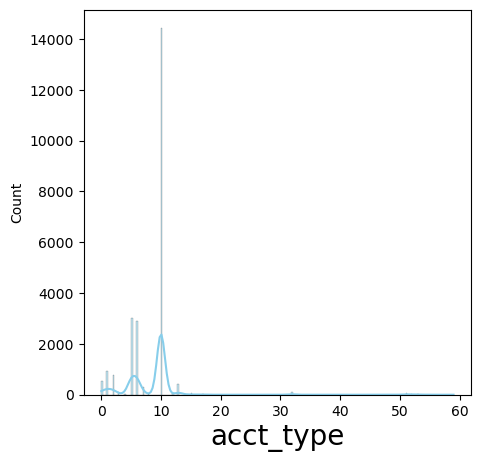

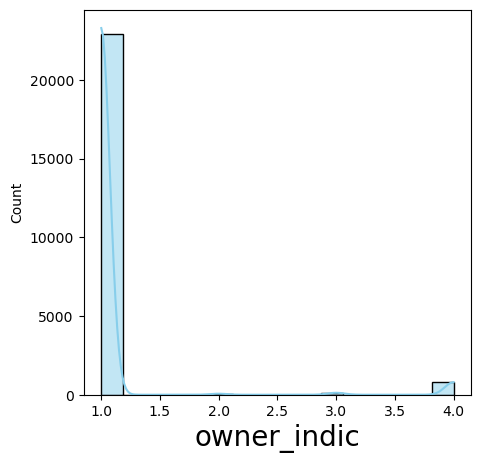

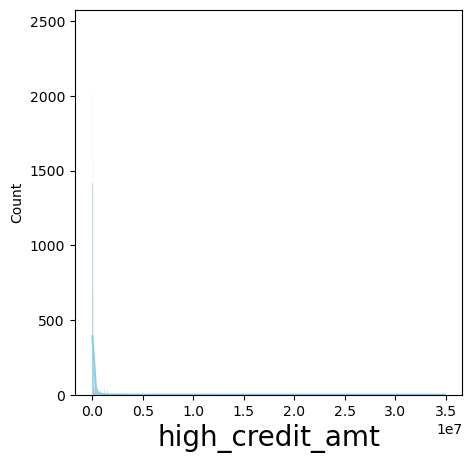

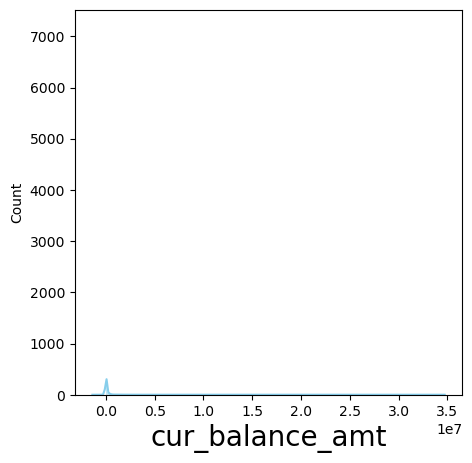

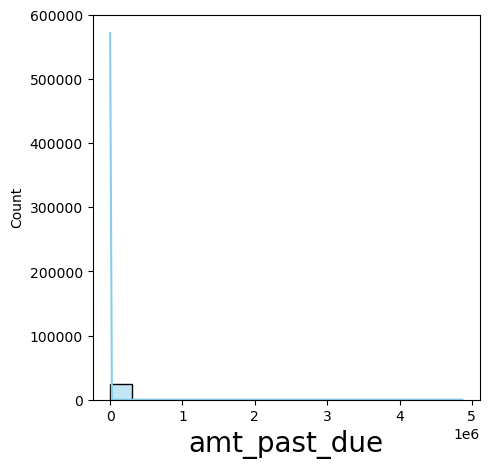

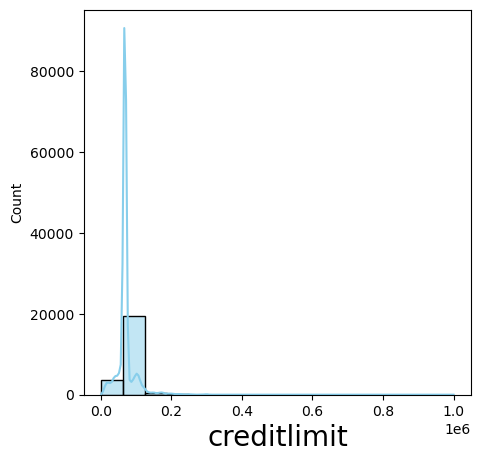

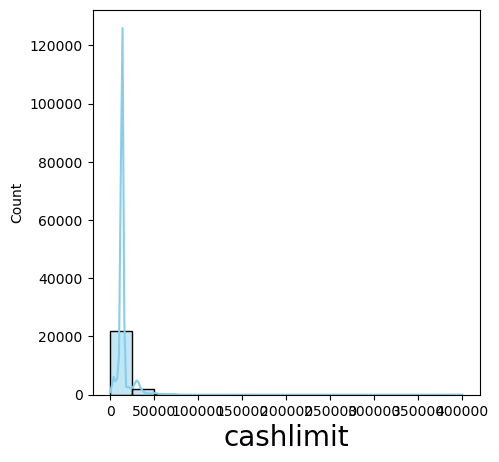

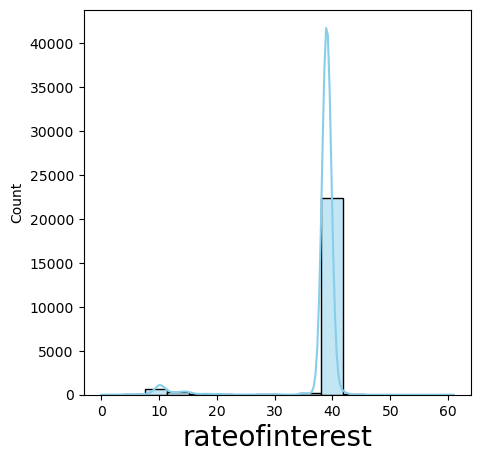

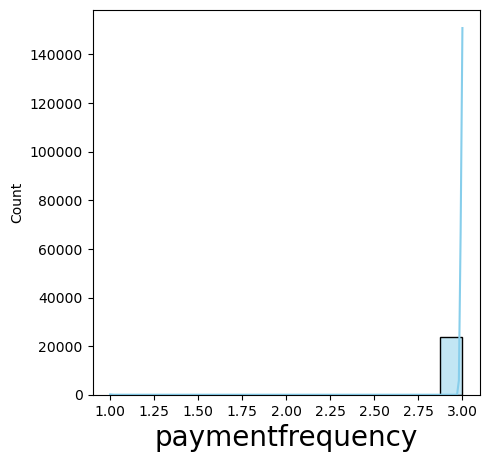

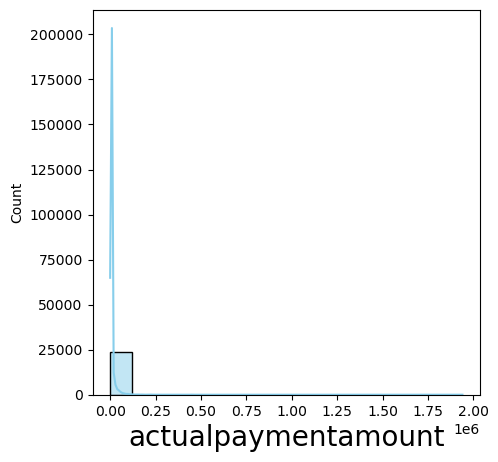

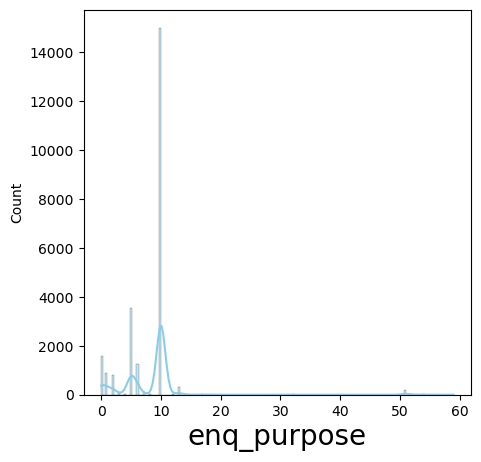

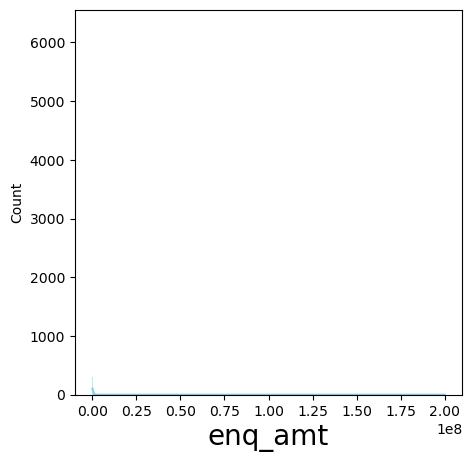

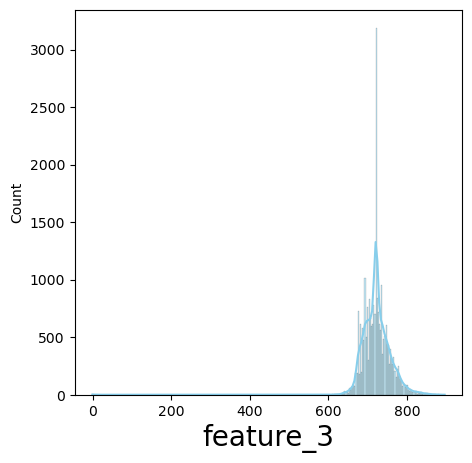

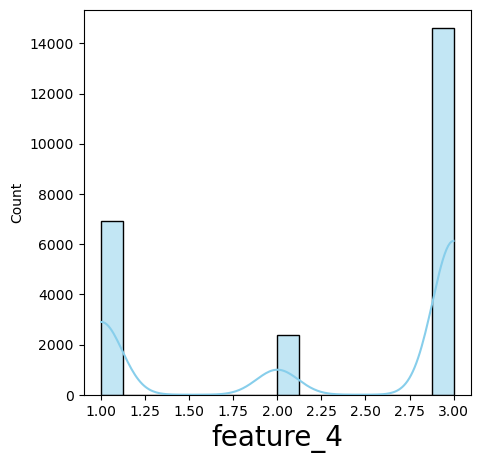

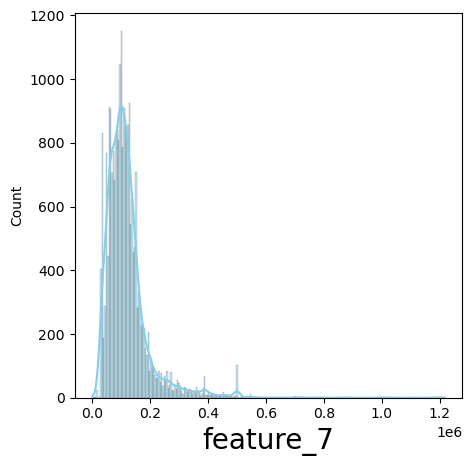

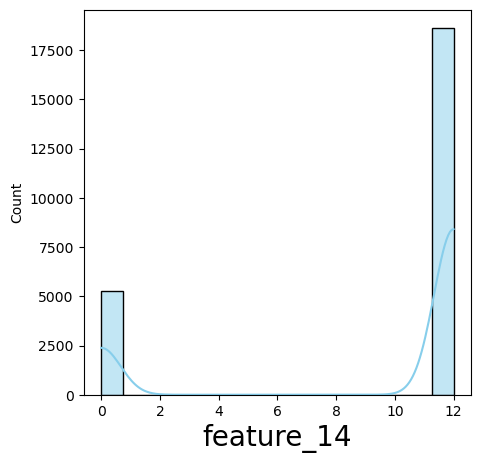

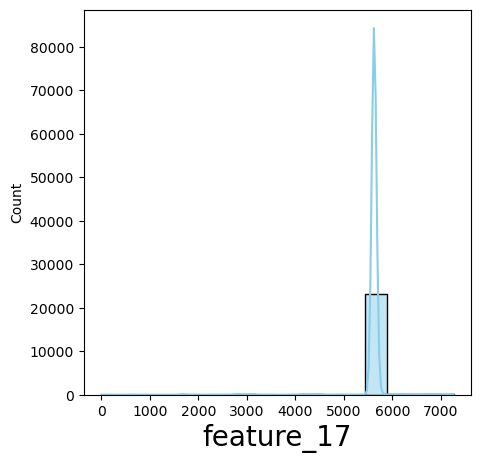

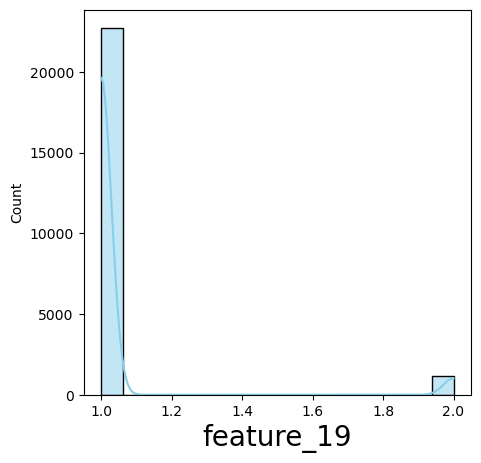

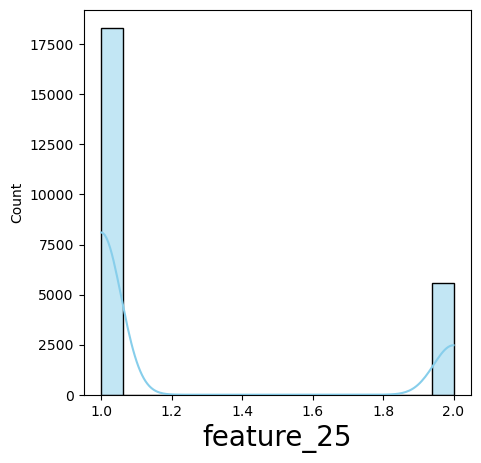

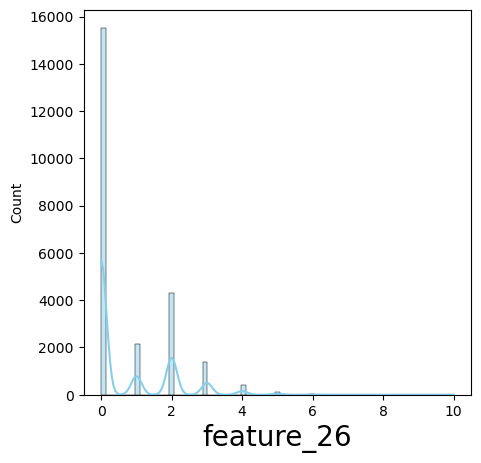

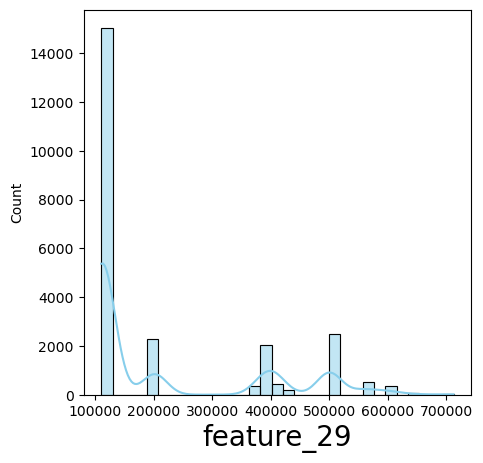

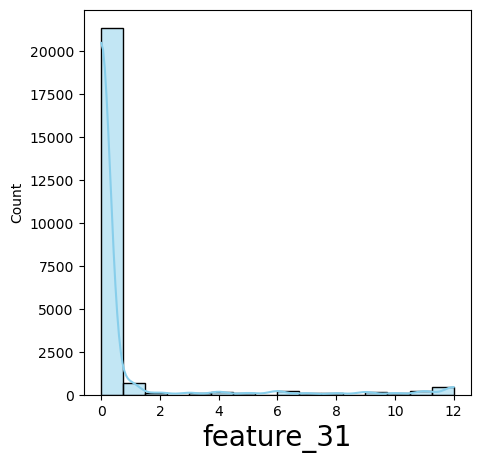

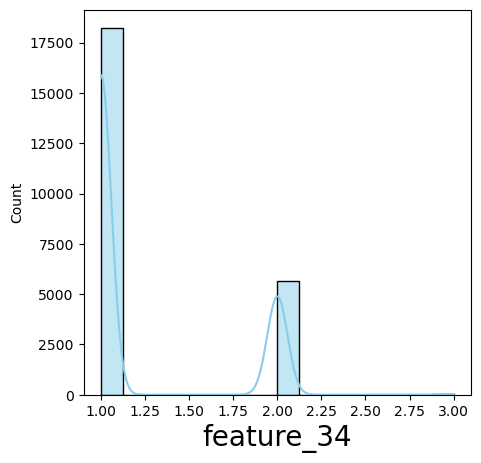

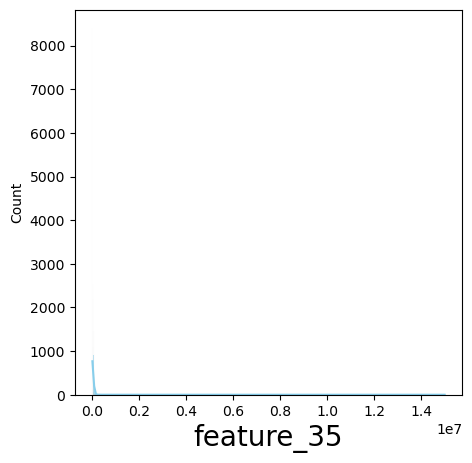

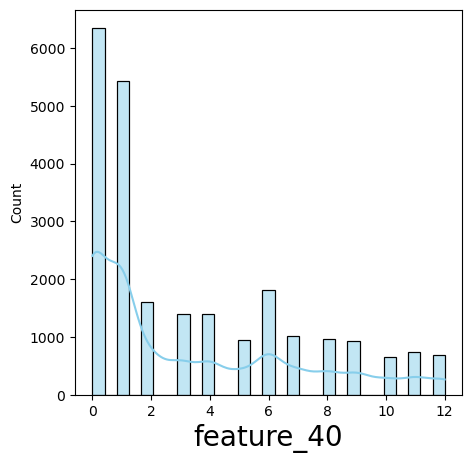

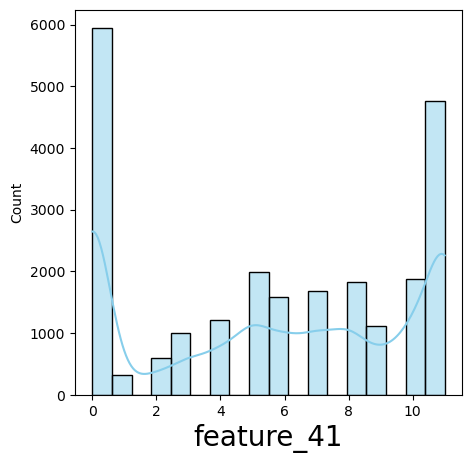

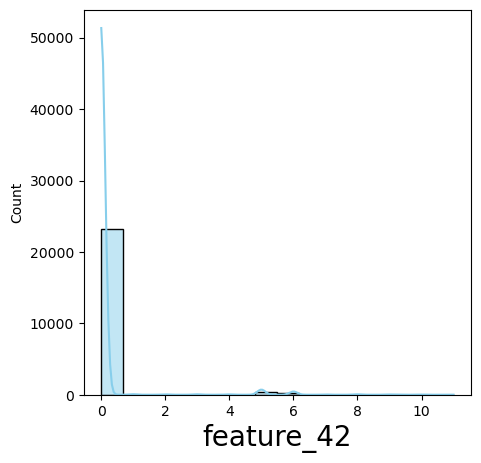

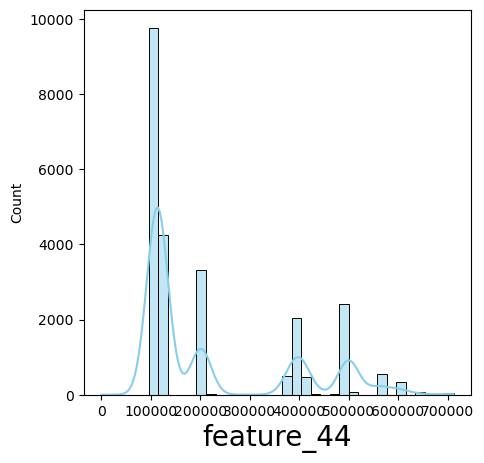

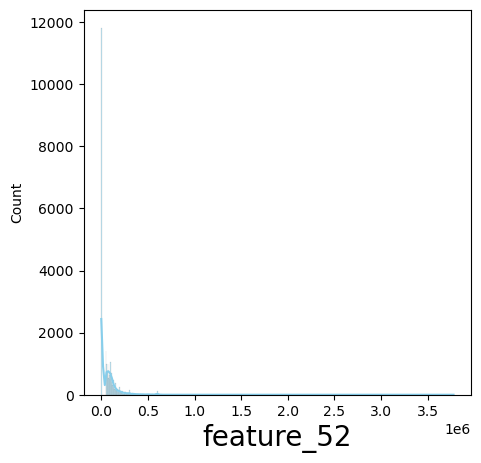

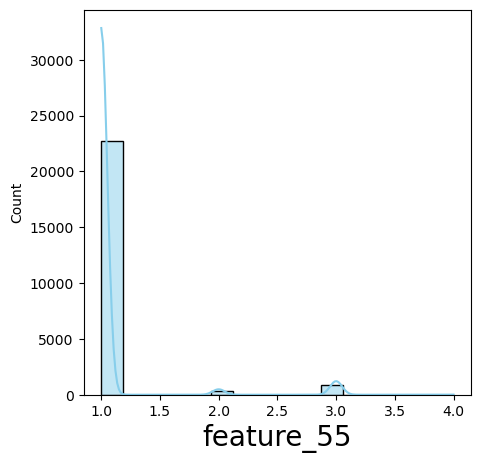

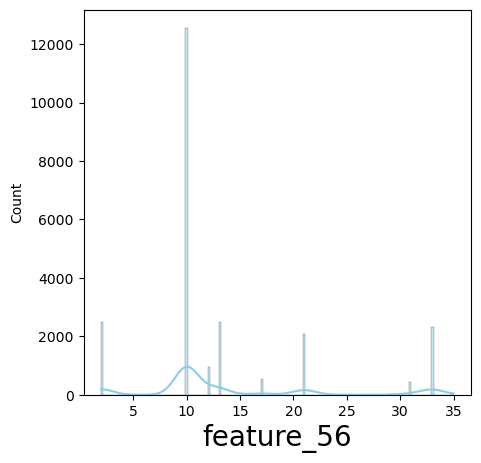

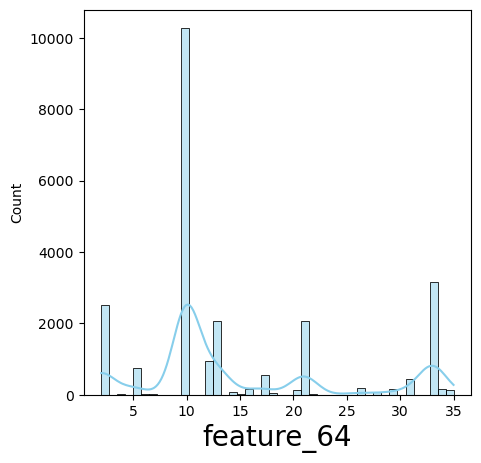

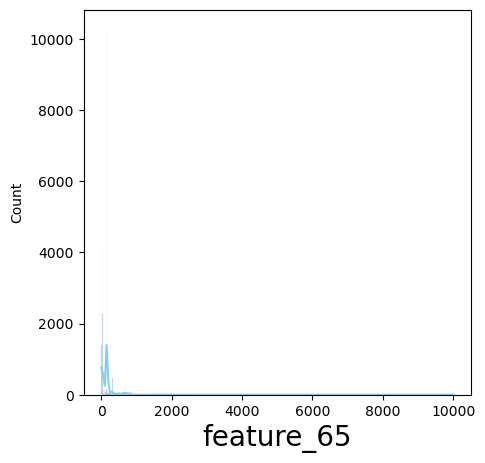

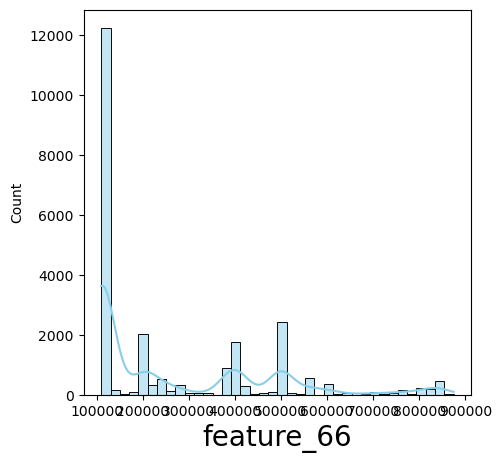

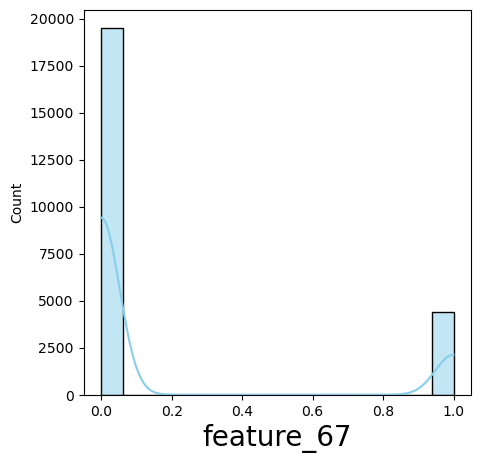

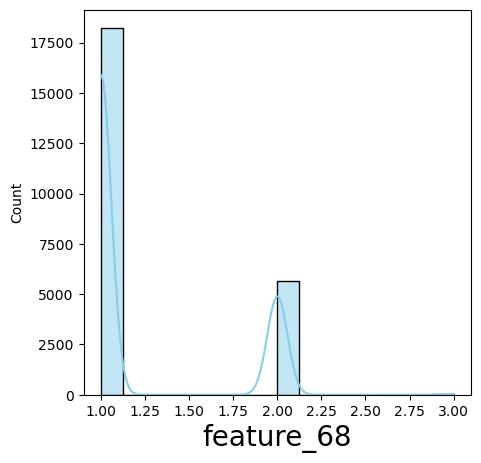

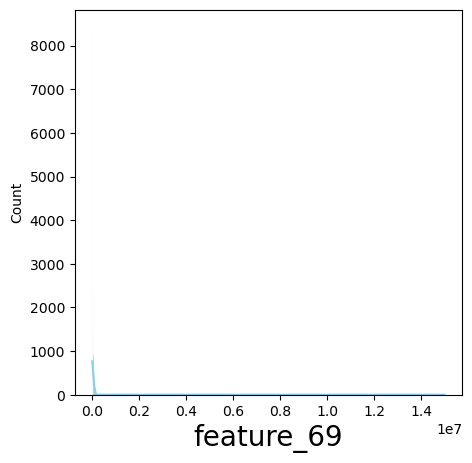

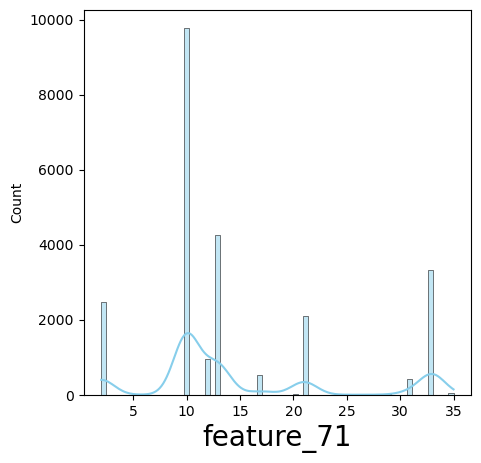

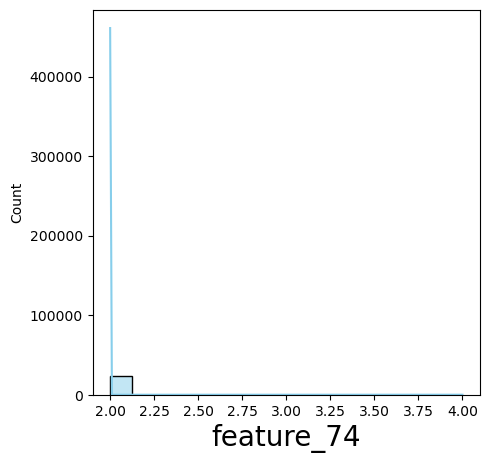

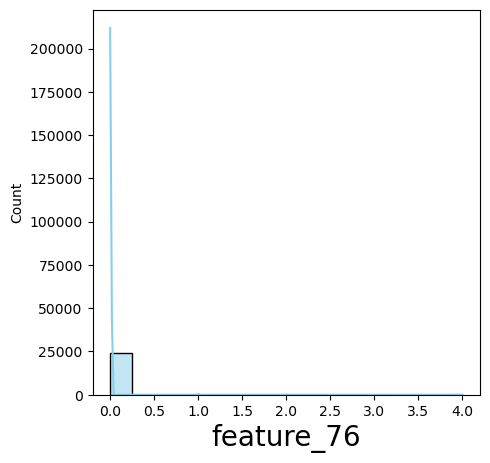

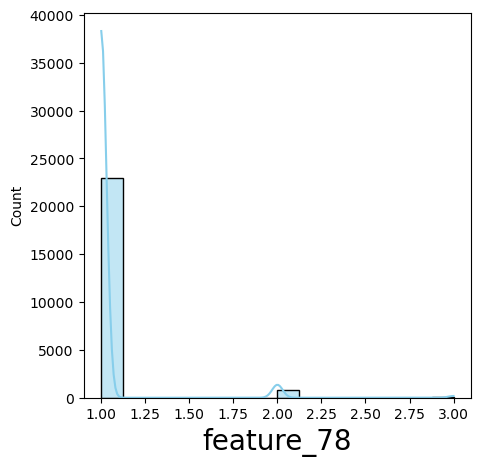

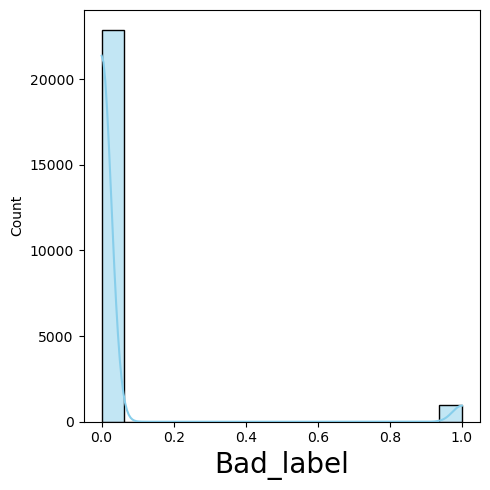

In [119]:
# Initialize a counter variable to manage subplot positioning
num = 1

# Loop through each numeric column in the 'num_col' list
for i in num_col:
    
    # Ensure that the loop runs only if 'num' is less than or equal to the number of numeric columns
    if num <= len(num_col):
        
        # Create a new figure for each column
        plt.figure(figsize=(5, 5))
        
        # Plot a histogram with a KDE (Kernel Density Estimate) for the current numeric column 'i'
        # 'sns.histplot()' plots the histogram; 'kde=True' adds the KDE curve
        # 'color="skyblue"' sets the color of the plot
        sns.histplot(data=data, x=i, kde=True, color='skyblue')
        
        # Set the x-axis label to the column name, with a larger font size
        plt.xlabel(i, fontsize=20)
        
        # Increment the 'num' variable to manage the next plot
        num += 1

# Adjust layout to ensure the plots do not overlap
plt.tight_layout()

# Display all the generated plots
plt.show()


##### Highly Skewed Features (Right-Skewed)
> * high_credit_amt, cur_balance_amt, amt_past_due, 
    creditlimit, cashlimit, rateofinterest, 
    actualpaymentamount, enq_amt, feature_3, feature_7, 
    feature_10, feature_30, feature_39, feature_49, 
    feature_65, feature_78

## Discrete Numeric Features

> * acct_type, owner_indic, paymentfrequency, enq_purpose,
    feature_14, feature_25, feature_26, 
    feature_34, feature_41, feature_42, feature_56, 
    feature_66, feature_71

## Normally / Uniformly Distributed Features

> * feature_4, feature_17, feature_31, feature_67, 
    feature_69, feature_72

##  Irregular / Multimodal Distributions

> * feature_19, feature_28, feature_29, feature_35, 
    feature_44, feature_52, feature_64, feature_74

## Low-Variance / Flat Features

> * feature_5, feature_15, feature_16, feature_58, feature_76


In [122]:
# Drop specific columns ('feature_5', 'feature_15', 'feature_16', 'feature_58', 'feature_76') from the 'data' DataFrame
# 'axis=1' specifies that columns (not rows) should be dropped
# 'inplace=True' modifies the original 'data' DataFrame directly, without creating a new DataFrame
data.drop(['feature_5', 'feature_15', 'feature_16', 'feature_58', 'feature_76'], axis=1, inplace=True)


In [128]:
# Select columns from the 'data' DataFrame that have the data type 'object'
# 'object' type typically represents categorical or string data in pandas
# 'select_dtypes(include=['object'])' filters columns with 'object' type
# '.columns' retrieves the column names of the selected columns
# '.tolist()' converts the column names into a list and stores it in 'cat_col'
cat_col = data.select_dtypes(include=['object']).columns.tolist()


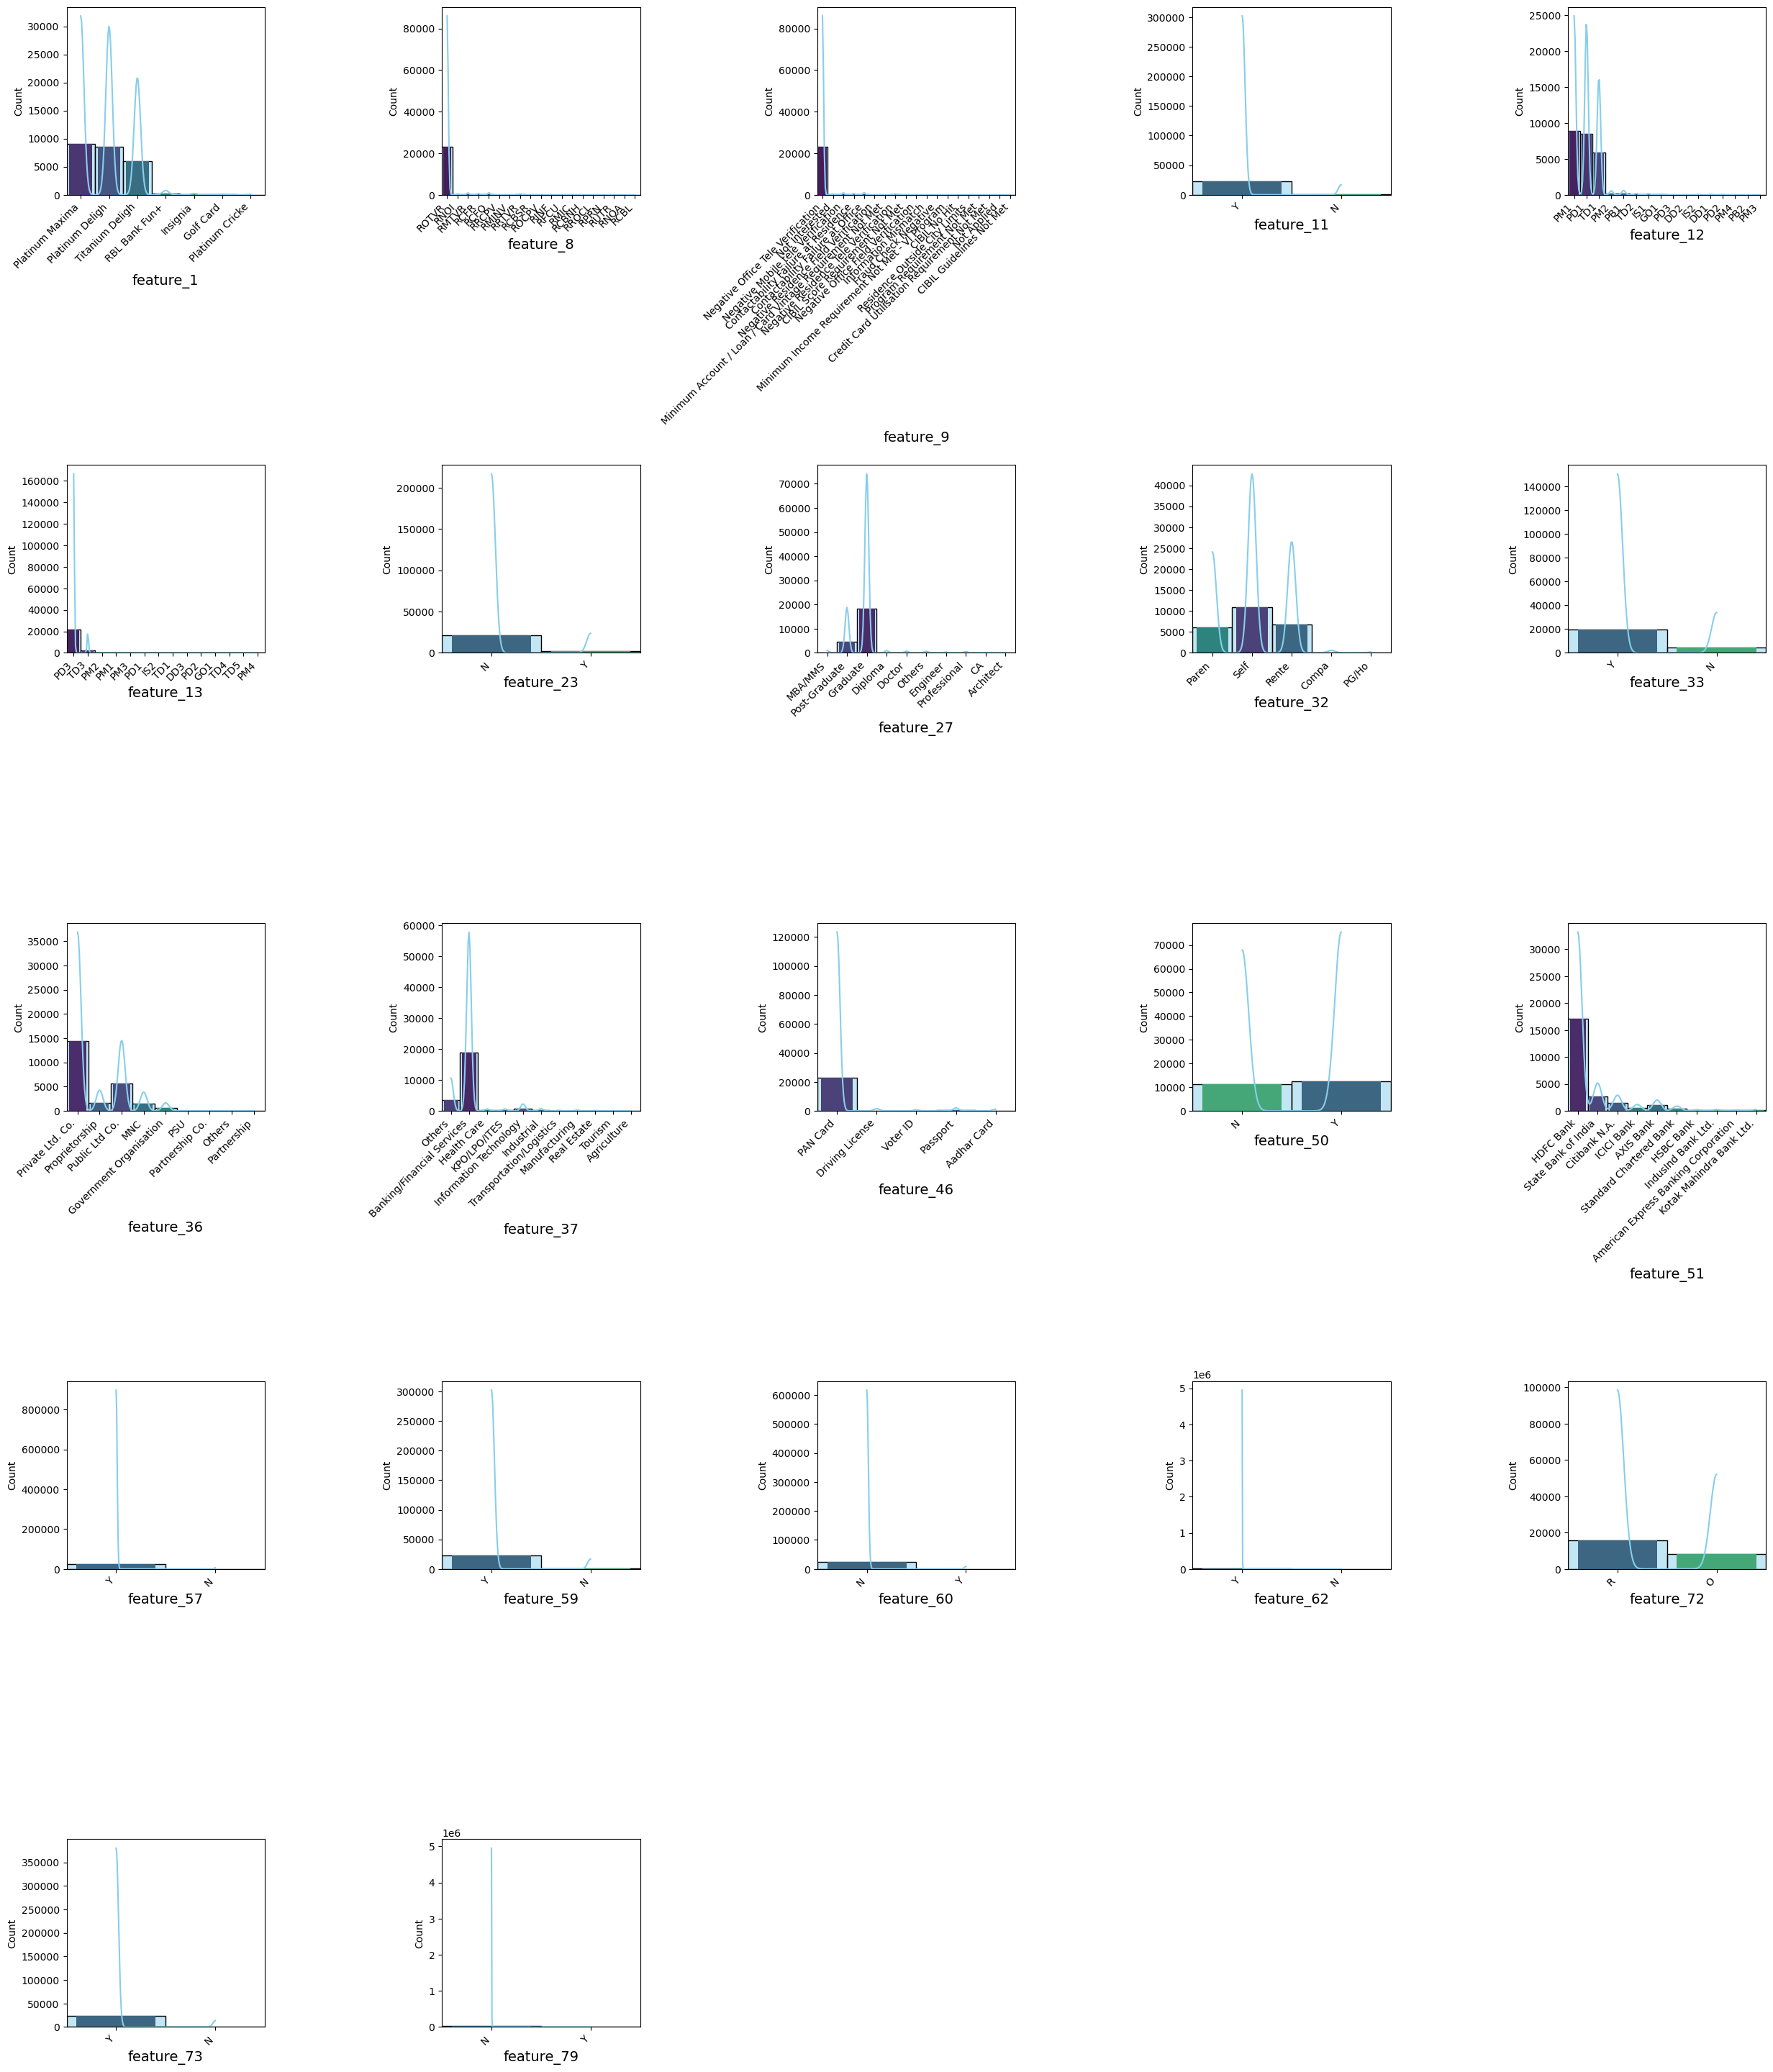

In [130]:
# Set the size of the entire figure (25x35) for better spacing between subplots
plt.figure(figsize=(25, 35))  

# Initialize a counter to manage subplot positions
num = 1

# Loop through each categorical column in the 'cat_col' list
for i in cat_col:
    
    # Only plot columns with less than or equal to 50 unique values (low-cardinality)
    if data[i].nunique() <= 50:
        
        # Create a subplot with a grid of 6 rows and 5 columns to fit multiple plots
        plt.subplot(6, 5, num)
        
        # Plot a histogram with a KDE (Kernel Density Estimate) for the categorical feature 'i'
        # 'sns.histplot()' shows the distribution, and 'kde=True' adds the KDE curve
        sns.histplot(data=data, x=i, kde=True, color='skyblue')
        
        # Plot a count plot (bar plot) for the categorical feature 'i'
        # 'sns.countplot()' shows the frequency of each category in the feature
        # 'palette="viridis"' sets the color scheme
        # 'order=data[i].value_counts().index' ensures the categories are ordered by their frequency
        sns.countplot(data=data, x=i, palette='viridis', order=data[i].value_counts().index)
        
        # Set the x-axis label to the column name with a larger font size for better readability
        plt.xlabel(i, fontsize=14)
        
        # Rotate the x-axis labels by 45 degrees and align them to the right for better readability
        plt.xticks(rotation=45, ha='right')
        
        # Adjust the layout of the plots to prevent overlapping and ensure proper spacing between subplots
        plt.tight_layout(pad=2)  
        
        # Increment the subplot number to move to the next subplot position
        num += 1  

# Show the plots after all subplots are created
plt.show()


##  Feature Distribution Summary & Recommendations

###  Well-distributed Features
These features show a good spread across categories and are likely useful for modeling:
- `feature_1`
- `feature_27`
- `feature_32`
- `feature_33`
- `feature_50`

###  Highly Imbalanced Features
These features are heavily skewed toward one or very few values. They may provide limited information and require further evaluation:
- `feature_11`
- `feature_13`
- `feature_23`
- `feature_57`
- `feature_59`
- `feature_60`
- `feature_62`
- `feature_72`
- `feature_73`

###  High Cardinality with Sparse Values
These features have many unique values with low frequency. They may increase model complexity and should be encoded or reduced:
- `feature_8`
- `feature_9`
- `feature_37`
- `feature_51`

### Constant or Nearly Constant Feature (Drop)
These features have no or very little variance and should be dropped:
- `feature_79`


In [133]:
# Drop the 'feature_79' column from the 'data' DataFrame
# 'axis=1' specifies that we are dropping a column (not a row)
# 'inplace=True' modifies the original 'data' DataFrame directly, without creating a new DataFrame
data.drop('feature_79', axis=1, inplace=True)


In [135]:
# Select columns from the 'data' DataFrame that are of type 'float64' or 'int64' (numeric columns)
# 'select_dtypes(include=['float64', 'int64'])' filters the columns by their data types (numeric types)
# '.columns.tolist()' retrieves the column names of the filtered columns and converts them into a list
num_col = data.select_dtypes(include=['float64', 'int64']).columns.tolist()


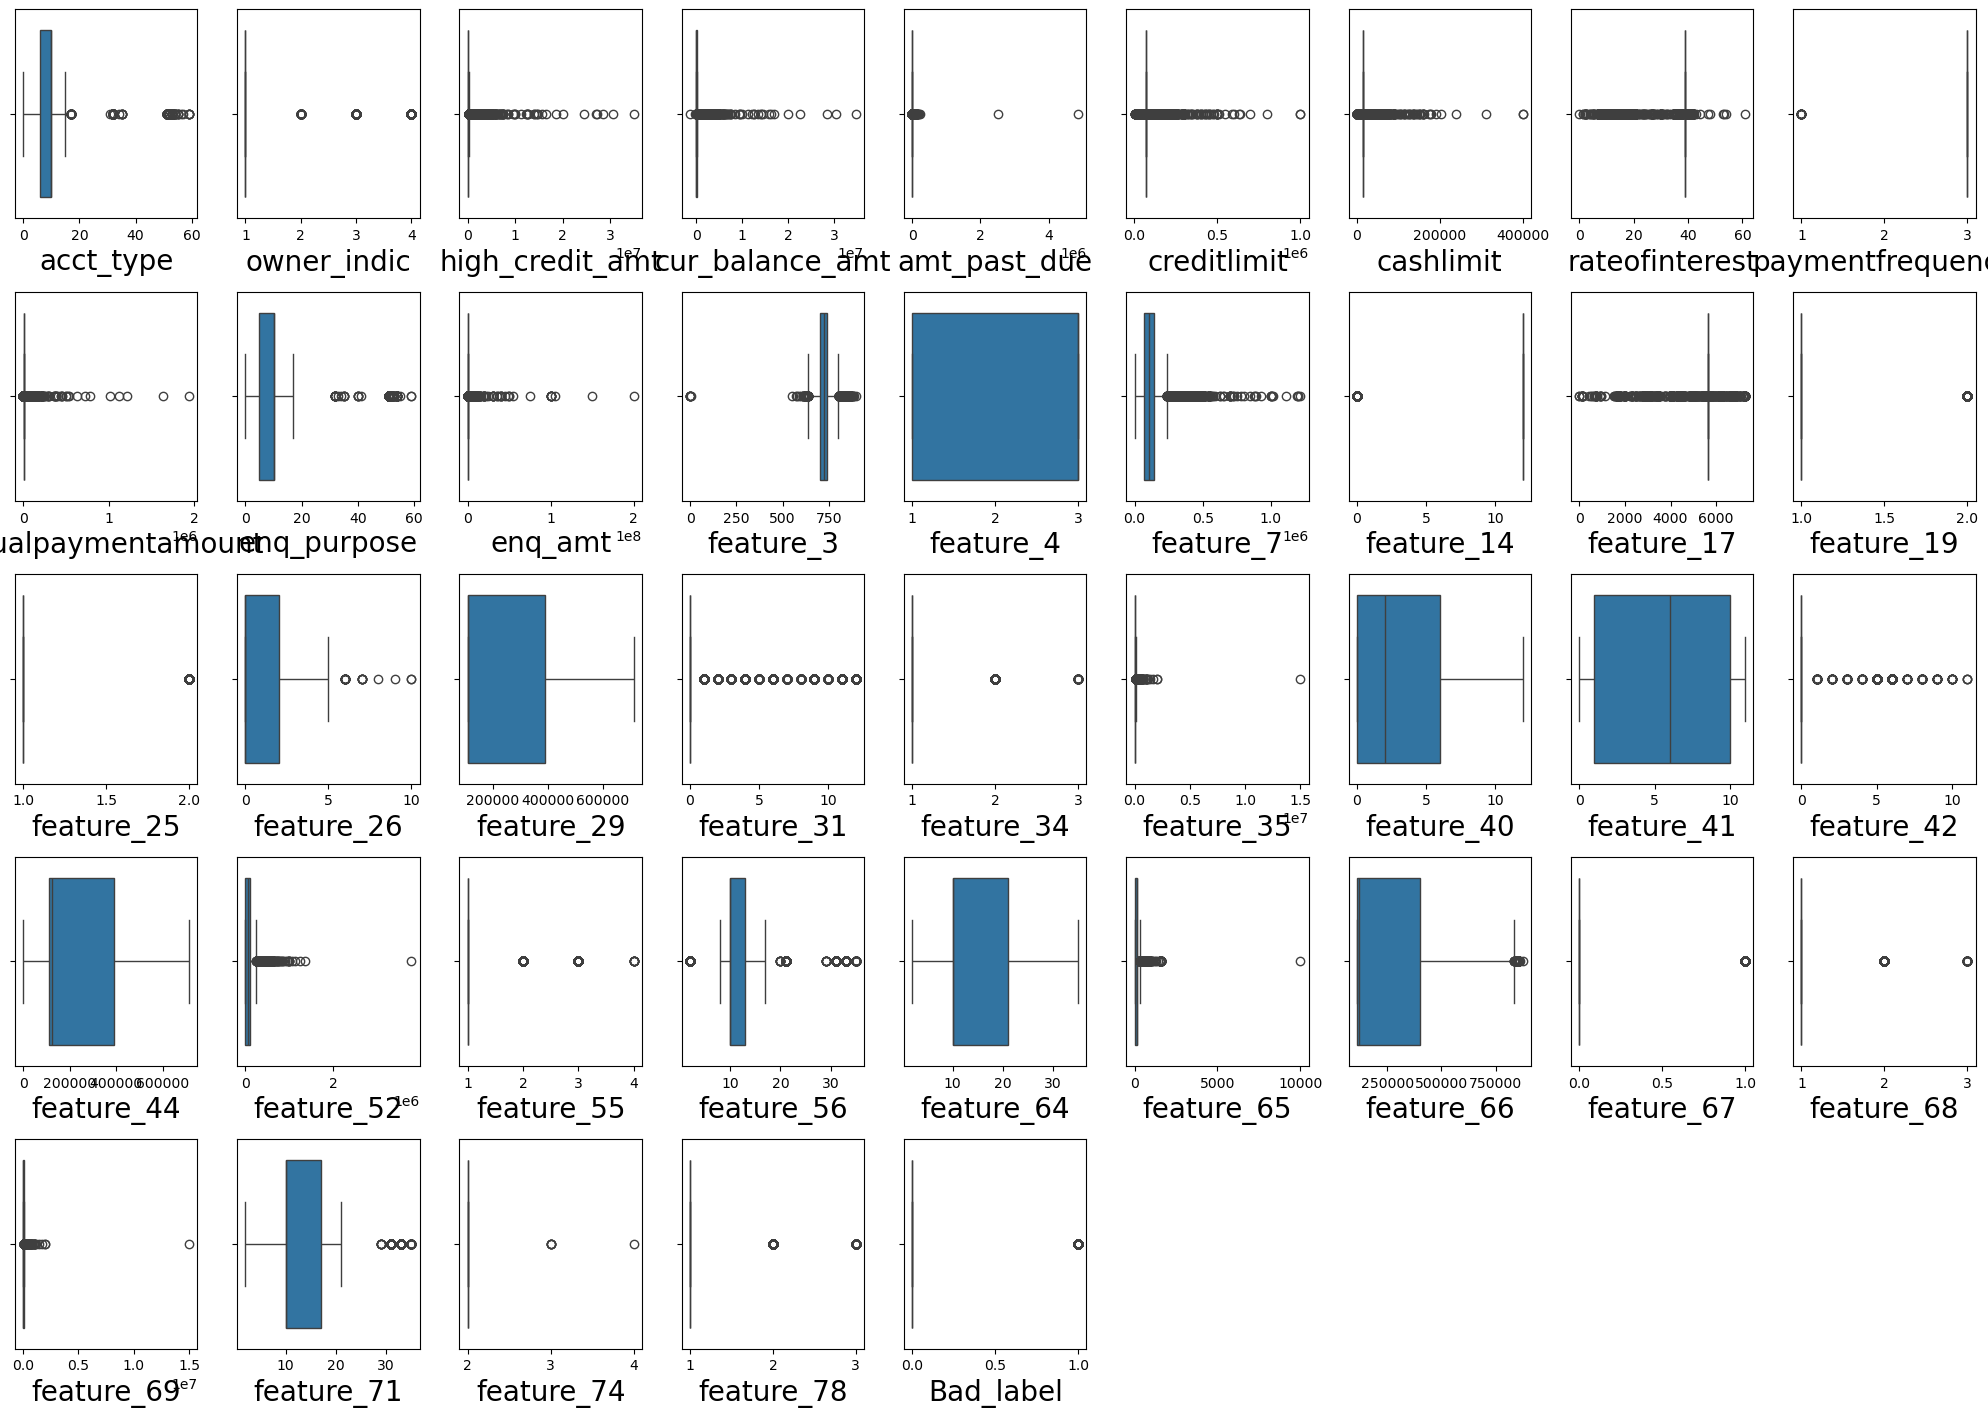

In [137]:
# Set the size of the entire figure (20x25) for better spacing between subplots
plt.figure(figsize=(20, 25))

# Initialize a counter variable to manage subplot positions
num = 1

# Loop through each numeric column in the 'num_col' list
for i in num_col:
    
    # Ensure the loop runs only if 'num' is less than or equal to the number of numeric columns
    if num <= len(num_col):
        
        # Create a subplot with a grid of 9 rows and 9 columns to fit multiple plots
        plt.subplot(9, 9, num)
        
        # Plot a boxplot for the current numeric column 'i'
        # sns.boxplot(x=data[i]) creates a boxplot for each numeric feature
        sns.boxplot(x=data[i])  
        
        # Set the x-axis label to the column name with a larger font size for better readability
        plt.xlabel(i, fontsize=20)
        
        # Increment the 'num' variable to manage the next plot position
        num += 1  

# Adjust layout to prevent overlapping of subplots and ensure proper spacing
plt.tight_layout()

# Show all the generated plots
plt.show()


In [138]:
# Define a list of columns that are suspected or known to contain outliers in the 'data' DataFrame
# These columns may have extreme values or deviations that could affect analysis or modeling
outliers_col =  [ 
    "acct_type","high_credit_amt","cur_balance_amt","amt_past_due","creditlimit","cashlimit","enq_purpose","enq_amt",
    "feature_3","feature_26","feature_56","feature_66","feature_71"]


In [141]:
# Loop through each column in the 'outliers_col' list to handle outliers
for i in outliers_col:
    
    # Calculate the first quartile (Q1) of the column 'i' using the quantile function
    Q1 = data[i].quantile(0.25)
    
    # Calculate the third quartile (Q3) of the column 'i'
    Q3 = data[i].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR) which is the difference between Q3 and Q1
    IQR = Q3 - Q1
    
    # Define the lower bound for outliers as Q1 - 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    # Define the upper bound for outliers as Q3 + 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace values in the column 'i' that are below the lower bound or above the upper bound with the median of the column
    # This helps to handle outliers by replacing them with a value closer to the center of the data
    data.loc[(data[i] > upper_bound) | (data[i] < lower_bound), i] = data[i].median()


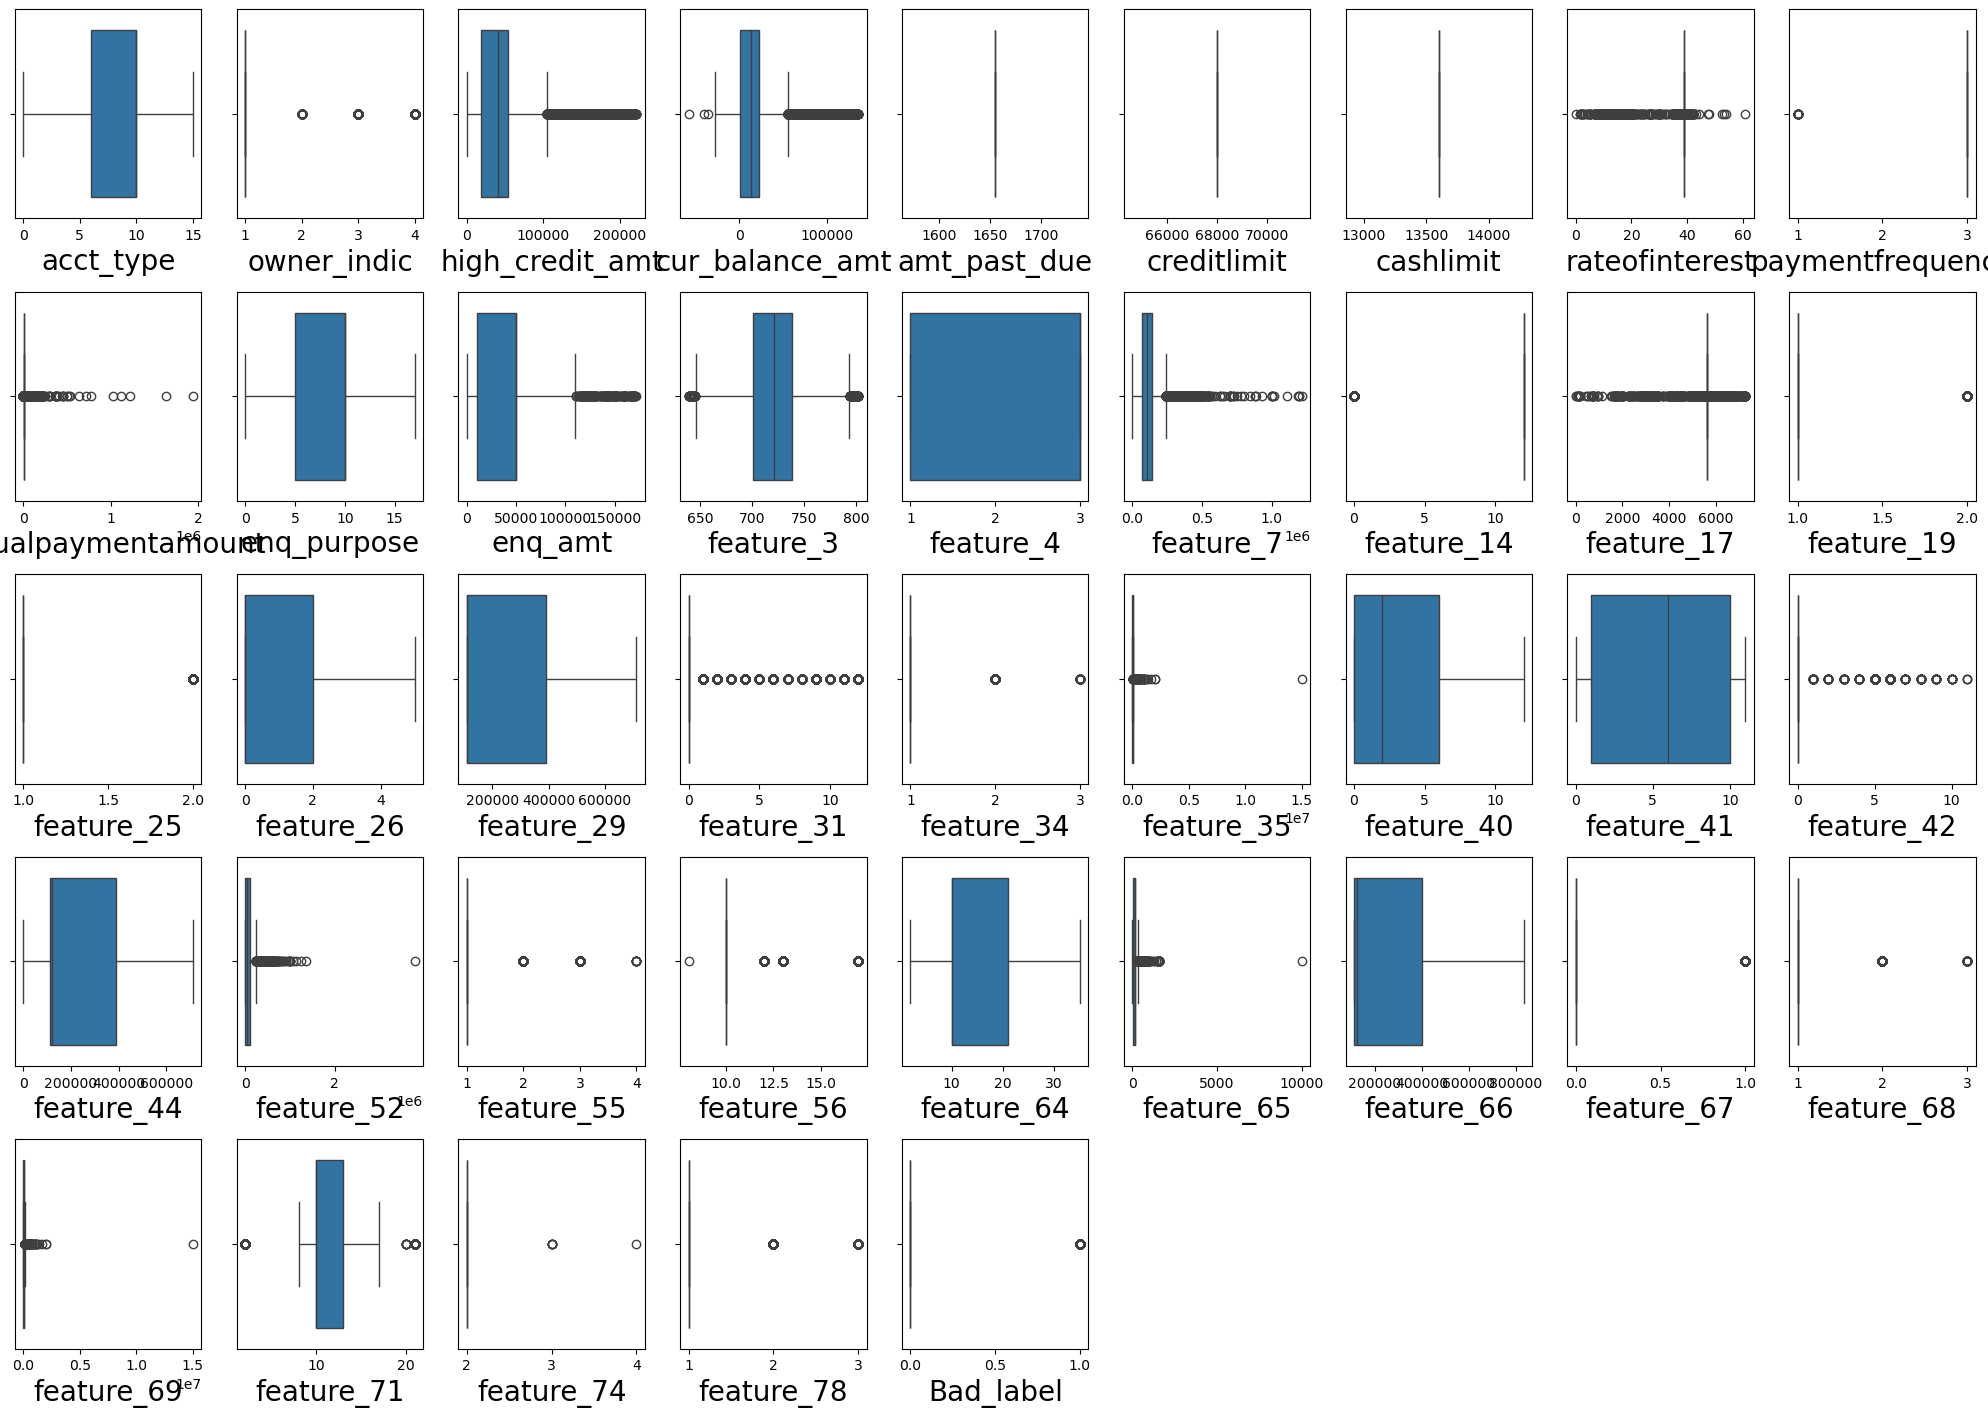

In [143]:
# Set the figure size for the entire plot (20x25) to ensure ample space for multiple subplots
plt.figure(figsize=(20, 25))

# Initialize a counter variable 'num' to manage the subplot positions
num = 1

# Loop through each numeric column in the 'num_col' list
for i in num_col:
    
    # Ensure the loop runs only if 'num' is less than or equal to the total number of numeric columns
    if num <= len(num_col):
        
        # Create a subplot with a 9x9 grid layout, where 'num' determines the position of each plot
        plt.subplot(9, 9, num)
        
        # Plot a boxplot for the current numeric column 'i'
        # Boxplots help visualize the distribution and identify outliers for each numeric feature
        sns.boxplot(x=data[i]) 
        
        # Set the x-axis label for each subplot to the current column name
        plt.xlabel(i, fontsize=20)
        
        # Increment the 'num' variable to move to the next subplot position
        num += 1 

# Adjust the layout to ensure the subplots don't overlap and are spaced neatly
plt.tight_layout()

# Display all the generated subplots (boxplots)
plt.show()


In [145]:
# Use pandas' 'get_dummies' function to convert categorical column 'feature_1' into dummy/indicator variables
# This is a common step for one-hot encoding categorical variables, where each unique category in 'feature_1' gets its own column
# The 'dtype=int' ensures the dummy variables are of integer type (0 or 1) instead of the default float type.
data = pd.get_dummies(data, columns=['feature_1'], dtype=int)


In [147]:
# Convert the 'opened_dt' column to datetime format using pandas' 'to_datetime' function
# This ensures the column is treated as a datetime object, allowing for time-based operations
data['opened_dt'] = pd.to_datetime(data['opened_dt'])

# Extract the year, month, and day from the 'opened_dt' datetime column and create new columns
# 'data['year']' will store the year part of the 'opened_dt'
# 'data['month']' will store the month part of the 'opened_dt'
# 'data['day']' will store the day part of the 'opened_dt'
data['year'], data['month'], data['day'] = data['opened_dt'].dt.year, data['opened_dt'].dt.month, data['opened_dt'].dt.day


In [149]:
# Fill missing values (NaNs) in the 'year' column with the most frequent value (mode) of that column
# The 'data['year'].mode()[0]' returns the most frequent value (the mode) of the 'year' column
# 'inplace=True' ensures that the changes are applied directly to the 'year' column in the 'data' DataFrame without creating a new variable
data['year'].fillna(data['year'].mode()[0], inplace=True)


In [151]:
# Fill missing values (NaNs) in the 'month' column with the most frequent value (mode) of that column
# The 'data['month'].mode()[0]' returns the most frequent value (the mode) of the 'month' column
# 'inplace=True' ensures that the changes are applied directly to the 'month' column in the 'data' DataFrame without creating a new variable
data['month'].fillna(data['month'].mode()[0], inplace=True)

In [153]:
# Fill missing values (NaNs) in the 'day' column with the most frequent value (mode) of that column
# The 'data['day'].mode()[0]' returns the most frequent value (the mode) of the 'day' column
# 'inplace=True' ensures that the changes are applied directly to the 'day' column in the 'data' DataFrame without creating a new variable
data['day'].fillna(data['day'].mode()[0], inplace=True)

In [155]:
# Convert the 'closed_dt' column to datetime format using pandas' 'to_datetime' function
# This ensures the column is treated as a datetime object, allowing for time-based operations
data['closed_dt'] = pd.to_datetime(data['closed_dt'])

# Extract the year, month, and day from the 'closed_dt' datetime column and create new columns
# 'data['year']' will store the year part of the 'closed_dt'
# 'data['month']' will store the month part of the 'closed_dt'
# 'data['day']' will store the day part of the 'closed_dt'
data['year_close'], data['month_close'], data['day_close'] = data['closed_dt'].dt.year, data['closed_dt'].dt.month, data['closed_dt'].dt.day


In [157]:
# Fill missing values (NaNs) in the 'year_close' column with the most frequent value (mode) of that column
# The 'data['year_close'].mode()[0]' returns the most frequent value (the mode) of the 'year_close' column
# 'inplace=True' ensures that the changes are applied directly to the 'year_close' column in the 'data' DataFrame without creating a new variable
data['year_close'].fillna(data['year_close'].mode()[0], inplace=True)

In [159]:
# Fill missing values (NaNs) in the 'month_close' column with the most frequent value (mode) of that column
# The 'data['month_close'].mode()[0]' returns the most frequent value (the mode) of the 'month_close' column
# 'inplace=True' ensures that the changes are applied directly to the 'month_close' column in the 'data' DataFrame without creating a new variable
data['month_close'].fillna(data['month_close'].mode()[0], inplace=True)

In [161]:
# Fill missing values (NaNs) in the 'day_close' column with the most frequent value (mode) of that column
# The 'data['day_close'].mode()[0]' returns the most frequent value (the mode) of the 'day_close' column
# 'inplace=True' ensures that the changes are applied directly to the 'day_close' column in the 'data' DataFrame without creating a new variable
data['day_close'].fillna(data['day_close'].mode()[0], inplace=True)

In [163]:
# Drop the 'opened_dt' and 'closed_dt' columns from the DataFrame as they are no longer needed for analysis
# The 'axis=1' argument specifies that we are dropping columns (as opposed to rows)
# 'inplace=True' ensures that the changes are applied directly to the 'data' DataFrame without creating a new one
data.drop(['opened_dt', 'closed_dt'], axis=1, inplace=True)


In [165]:
# Select columns from the DataFrame that have data types of 'object' (i.e., categorical or string columns)
# 'data.select_dtypes(include=['object'])' returns all columns that are of type 'object', which typically represents categorical variables
# '.columns.tolist()' extracts the column names from the resulting DataFrame and converts them into a list
# This will give a list of all the categorical columns in the 'data' DataFrame
cat_col = data.select_dtypes(include=['object']).columns.tolist()


In [167]:
len(cat_col)

25

In [169]:
# Importing the LabelEncoder class from scikit-learn's preprocessing module
from sklearn.preprocessing import LabelEncoder 

# Initialize a LabelEncoder object (LE) that will be used to encode categorical labels into numeric values
LE = LabelEncoder()

# Apply label encoding to each categorical column in the 'cat_col' list
# The 'fit_transform()' method learns the mapping of each category to a numeric value and then transforms the column to numeric values
for i in cat_col:
    data[i] = LE.fit_transform(data[i])


### 2. Feature Selection

* Feature selection is the process of choosing the most relevant variables from a dataset that contribute significantly to a model’s predictive power. By reducing the number of features, it simplifies the model, improves training efficiency, and can enhance accuracy by removing noise or irrelevant data. Common techniques include correlation analysis, mutual information, and advanced methods like recursive feature elimination (RFE) and Lasso regularization.

In [173]:
# Select all columns with numerical data types (int and float) from the DataFrame using 'np.number'
num_cols = data.select_dtypes(include=[np.number])

# Compute the correlation matrix for the numerical columns using the '.corr()' method
# The '.corr()' method calculates pairwise correlation of columns (default is Pearson correlation)
# The '.abs()' function is used to get the absolute values of the correlation coefficients, as we are interested in the magnitude of the correlation, regardless of the sign
correlation_matrix = num_cols.corr().abs()

# Iterate through the upper triangle of the correlation matrix to find pairs of columns with high correlation
# The outer loop iterates through the rows of the correlation matrix
for i in range(len(correlation_matrix.columns)):
    # The inner loop iterates through the columns before the current row (avoiding duplicate checks)
    for j in range(i):
        # Get the correlation value between the pair of columns
        corr_value = correlation_matrix.iloc[i, j]
        # If the absolute correlation value is greater than 0.90, print the pair of columns with high correlation
        if abs(corr_value) > 0.90:
            # Print the pair of columns and their correlation coefficient
            print(f"High correlation: {correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]} (r = {corr_value:.2f})")


High correlation: feature_9 ↔ feature_8 (r = 0.94)
High correlation: feature_44 ↔ feature_29 (r = 0.98)
High correlation: feature_55 ↔ feature_19 (r = 0.92)
High correlation: feature_59 ↔ feature_11 (r = 1.00)
High correlation: feature_67 ↔ feature_33 (r = 1.00)
High correlation: feature_68 ↔ feature_34 (r = 1.00)
High correlation: feature_69 ↔ feature_35 (r = 1.00)
High correlation: feature_70 ↔ feature_34 (r = 0.92)
High correlation: feature_70 ↔ feature_68 (r = 0.92)


In [175]:
data.drop(['feature_9','feature_29','feature_55','feature_59','feature_67','feature_68','feature_69','feature_34','feature_68' ],axis=1,inplace=True)

In [177]:
data

,acct_type,owner_indic,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount,enq_purpose,enq_amt,feature_3,feature_4,feature_7,feature_8,feature_11,feature_12,feature_13,feature_14,feature_17,feature_19,feature_23,feature_25,feature_26,feature_27,feature_28,feature_31,feature_32,feature_33,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_48,feature_50,feature_51,feature_52,feature_56,feature_57,feature_60,feature_62,feature_64,feature_65,feature_66,feature_70,feature_71,feature_72,feature_73,feature_74,feature_78,Bad_label,feature_1_Golf Card,feature_1_Insignia,feature_1_Platinum Cricke,feature_1_Platinum Deligh,feature_1_Platinum Maxima,feature_1_RBL Bank Fun+,feature_1_Titanium Deligh,year,month,day,year_close,month_close,day_close
0,6,1,20900.0,0,1655.0,68000.0,13600.0,39.0,3.0,7345.0,10.0,10000.0,683.0,3.0,56000.0,13,1,10,5,12.0,5622.0,1.0,0,1.0,0.0,6,42,0.0,2,1,35000.0,6,7,4509,1.0,4.0,0.0,28,122001.0,2,19,0,3,0.0,10.0,1,0,1,10.0,157.0,110059.0,0,13.0,1,1,2.0,1.0,1,0,0,0,0,1,0,0,2013,6,9,2014,7,5
1,10,1,93473.0,0,1655.0,68000.0,13600.0,39.0,3.0,7345.0,5.0,1.0,687.0,3.0,125000.0,13,1,7,5,12.0,5622.0,1.0,0,1.0,2.0,8,18,0.0,4,1,100000.0,6,1,2019,1.0,2.0,0.0,21,121003.0,2,25,0,3,0.0,13.0,1,0,1,13.0,39.0,121003.0,0,13.0,1,1,2.0,1.0,1,0,0,0,1,0,0,0,2006,1,13,2007,7,26
2,10,1,40000.0,0,1655.0,68000.0,13600.0,39.0,3.0,7345.0,10.0,1000.0,746.0,3.0,91000.0,13,1,10,5,12.0,5622.0,2.0,0,1.0,0.0,5,42,0.0,2,1,1.0,6,7,893,1.0,10.0,0.0,47,110067.0,2,19,1,3,0.0,10.0,1,0,1,10.0,157.0,110074.0,0,10.0,0,1,2.0,1.0,0,0,0,0,0,1,0,0,2015,8,27,2015,2,4
3,10,1,195074.0,0,1655.0,68000.0,13600.0,39.0,3.0,7345.0,10.0,50000.0,757.0,1.0,139000.0,13,1,10,5,0.0,5622.0,1.0,1,1.0,0.0,2,12,0.0,2,1,50000.0,6,1,2629,0.0,0.0,0.0,13,600001.0,2,19,0,3,0.0,10.0,1,0,1,31.0,13.0,600001.0,130,10.0,0,1,2.0,1.0,0,0,0,0,0,1,0,0,2007,8,24,2014,1,7
4,10,1,15702.0,15183,1655.0,68000.0,13600.0,39.0,3.0,810.0,5.0,100000.0,740.0,3.0,151000.0,13,1,7,5,12.0,5622.0,1.0,0,1.0,0.0,5,42,0.0,3,0,1.0,7,1,247,1.0,10.0,1.0,48,201301.0,2,19,1,9,116000.0,10.0,1,0,1,10.0,157.0,110096.0,0,10.0,0,1,2.0,1.0,0,0,0,0,1,0,0,0,2014,8,22,2015,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,10,1,18732.0,601,1655.0,68000.0,13600.0,40.8,3.0,900.0,10.0,100000.0,756.0,1.0,111000.0,13,1,14,5,0.0,5622.0,1.0,0,2.0,0.0,5,42,0.0,2,1,1.0,1,1,2629,10.0,6.0,0.0,47,110070.0,2,19,0,3,0.0,10.0,1,0,1,10.0,157.0,110074.0,0,10.0,1,1,2.0,1.0,0,0,0,0,0,0,0,1,2014,11,5,2015,2,4
23892,5,1,200000.0,13300,1655.0,68000.0,13600.0,39.0,3.0,7345.0,5.0,50000.0,693.0,3.0,66000.0,11,1,10,5,12.0,5622.0,1.0,0,1.0,0.0,8,25,0.0,3,1,25000.0,8,1,2767,6.0,8.0,0.0,31,500018.0,2,19,1,9,65000.0,10.0,1,0,1,2.0,14.0,500018.0,0,2.0,0,0,2.0,1.0,0,0,0,0,0,1,0,0,2015,7,21,2015,2,4
23893,7,1,80000.0,0,1655.0,68000.0,13600.0,39.0,3.0,7345.0,5.0,1.0,668.0,3.0,58000.0,17,1,10,5,12.0,5622.0,1.0,0,1.0,0.0,5,42,0.0,3,1,1.0,8,1,4171,3.0,5.0,0.0,47,110024.0,2,19,1,9,0.0,10.0,1,0,1,10.0,157.0,110065.0,0,10.0,0,1,2.0,1.0,0,0,0,0,0,1,0,0,2014,12,29,2015,7,4
23894,10,1,6095.0,-7,1655.0,68000.0,13600.0,39.0,3.0,7345.0,0.0,60000.0,736.0,3.0,185000.0,13,1,7,5,12.0,5622.0,1.0,1,1.0,2.0,5,42,0.0,3,0,45000.0,6,1,1020,1.0,6.0,0.0,47,110037.0,2,19,0,3,0.0,10.0,1,0,1,13.0,45.0,125001.0,0,10.0,1,1,2.0,1.0,0,0,0,0,1,0,0,0,2012,4,13,2015,2,4


## Model Creation Process

In [179]:
x = data.drop("Bad_label",axis=1)
y = data.Bad_label

### Scalling Technique

* Scaling is very important of continous features because some model give more priproty to that features which has higest values campare to another features. that's why we use Scaling to make all values into certain range.
 
* Basically there are 2 type of scaling.

1. **MinMax Scaling**
2. **Standardization Scaling**

* MinMax Scaling transform all data between 0 to 1  range.
* Standardization Scaling transform all data between -3 to +3 range. it use z-score to tranform data.

In [184]:
# Importing the StandardScaler class from scikit-learn's preprocessing module
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler object, which will be used to standardize the features
# StandardScaler standardizes features by removing the mean and scaling to unit variance (z-score normalization)
scaler = StandardScaler()


In [186]:
# Standardize the feature set 'x' using the 'scaler' object (StandardScaler)
# 'fit_transform()' first computes the mean and standard deviation of each feature in 'x' (fit),
# and then scales the data by transforming it (subtracting the mean and dividing by the standard deviation)
# The result is stored in 'x_scale', which is the standardized version of the input features 'x'
x_scale = scaler.fit_transform(x)


## PCA:- Principle Components Analysis

* Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms high-dimensional data into a smaller set of uncorrelated variables called principal components. These components capture the most variance in the data, making it possible to reduce complexity while retaining important information. PCA is useful for visualizing data in lower dimensions and improving model performance by removing noise and redundancy.

In [190]:
# Importing the PCA (Principal Component Analysis) class from scikit-learn's decomposition module
from sklearn.decomposition import PCA

# Initialize the PCA object, specifying the number of components to keep after dimensionality reduction
# 'n_components=15' means that PCA will reduce the data to 15 principal components, 
# which are the new features that capture the most variance in the data
pca = PCA(n_components=15)


In [192]:
# Apply PCA (Principal Component Analysis) to the scaled feature set 'x_scale'
# The 'fit_transform()' method first computes the principal components (fit) and then transforms the data (x_scale) 
# into a lower-dimensional space using the top 15 principal components as specified earlier.
# The result is stored in 'data_pca', which is the transformed dataset with reduced dimensions (15 components).
data_pca = pca.fit_transform(x_scale)


In [194]:
data_pca

array([[-0.75645438, -0.92170408, -0.96423171, ...,  0.41921878,
         0.48575733, -0.64137971],
       [ 0.01979808, -6.78794776, -2.1832511 , ..., -0.065431  ,
         0.72414985, -0.39215735],
       [-1.19095602,  0.54231648,  0.04917688, ...,  0.46782839,
        -0.46711396, -0.11322713],
       ...,
       [-0.93064756, -0.52415089,  0.39256623, ...,  1.69892535,
         0.19756624,  2.26529926],
       [-1.83250773, -0.76327425,  0.37549848, ..., -1.76572794,
         0.47852072,  0.01460526],
       [ 4.19068896, -3.54394574,  0.09146404, ..., -1.28034597,
        -0.53818621, -1.45147841]])

In [196]:
pca.explained_variance_

array([3.55083527, 3.14797987, 2.81785592, 2.57612712, 2.22173401,
       2.01849842, 1.86369535, 1.76683609, 1.69528815, 1.55716623,
       1.44242952, 1.34864497, 1.24732592, 1.18708006, 1.15653395])

In [198]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data_pca,y,test_size=0.25,random_state=4)

In [200]:
x_train

array([[ 0.35292817,  1.20924462,  0.01385618, ..., -1.45595132,
        -0.46973071,  1.60854882],
       [ 5.57849668,  1.55219426, -2.77913007, ...,  0.58676587,
        -0.38888799,  0.38080308],
       [ 1.54156943,  1.64760917,  1.51411875, ...,  2.04502963,
         1.15289498,  1.42598932],
       ...,
       [ 0.64984029,  0.40886644, -0.61831127, ..., -0.48723299,
        -0.2735296 ,  0.2094859 ],
       [-1.7240146 ,  0.5399056 , -1.30800881, ..., -0.4802054 ,
        -0.84238003,  0.21542685],
       [-1.0284365 ,  2.46439691, -0.30402614, ...,  1.06982991,
         2.63266703, -1.46796572]])

In [202]:
x_test

array([[ 0.78563964,  0.96314442, -2.38871389, ..., -1.74992457,
         0.66682778,  2.31009957],
       [ 3.73964289,  1.10698998,  0.61795722, ..., -0.98148476,
        -0.89787911, -0.85829244],
       [ 3.37299878,  1.4548348 ,  0.88675001, ...,  1.32030857,
        -0.10223984, -0.09231216],
       ...,
       [-0.12329592,  1.05483573, -0.81535933, ..., -0.57717742,
         1.66121778,  0.67410864],
       [-3.34888862,  1.38238854, -2.14663173, ...,  1.98647846,
         2.56271738,  0.41346362],
       [-1.29394547,  2.0322681 , -1.73878615, ..., -1.4680606 ,
        -1.31927846,  0.17852636]])

In [204]:
y_train

15156    0
897      0
7879     0
19649    0
16486    0
        ..
11863    0
22401    0
17093    0
8366     0
17530    1
Name: Bad_label, Length: 17922, dtype: int64

In [206]:
y_test

1504     0
14558    0
16477    0
20001    0
23091    0
        ..
6783     0
17124    0
3458     0
23003    0
4547     0
Name: Bad_label, Length: 5974, dtype: int64

In [208]:
# Importing various classification models from scikit-learn, CatBoost, and XGBoost
from sklearn.linear_model import LogisticRegression  # Logistic Regression, used for binary or multiclass classification
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors, a simple algorithm for classification based on proximity to neighbors
from sklearn.svm import SVC, LinearSVC  # Support Vector Classifier (SVC), used for classification tasks with high-dimensional data; LinearSVC is for linear decision boundaries
from sklearn.tree import DecisionTreeClassifier  # Decision Tree, a non-linear classifier that splits data based on feature values
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier  # Ensemble methods for improved performance:
# RandomForest (multiple decision trees), Gradient Boosting (sequential learning), and AdaBoost (boosting weak learners)
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron (MLP), a type of neural network for classification
from catboost import CatBoostClassifier  # CatBoost, a gradient boosting algorithm designed for categorical data
from xgboost import XGBClassifier  # XGBoost, a highly efficient gradient boosting library for classification and regression tasks


In [210]:
# Importing classification evaluation metrics: confusion_matrix, accuracy_score, precision_score, 
# classification_report, f1_score, and roc_auc_score to assess model performance across various metrics.
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,classification_report,f1_score,roc_auc_score 

In [212]:
# Defining a dictionary of classification models with their respective hyperparameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Logistic Regression with max iterations set to 1000
    'K-Nearest Neighbors': KNeighborsClassifier(),  # K-Nearest Neighbors classifier
    'Support Vector Machine': SVC(),  # Support Vector Machine classifier
    'Linear SVM': LinearSVC(max_iter=10000),  # Linear Support Vector Machine with max iterations set to 10000
    'Decision Tree': DecisionTreeClassifier(),  # Decision Tree classifier
    'Random Forest': RandomForestClassifier(),  # Random Forest classifier (ensemble method)
    'Gradient Boosting': GradientBoostingClassifier(),  # Gradient Boosting classifier (ensemble method)
    'AdaBoost': AdaBoostClassifier(),  # AdaBoost classifier (ensemble method)
    'MLP Classifier': MLPClassifier(max_iter=1000),  # Multi-layer Perceptron classifier with max iterations set to 1000
    'CatBoost': CatBoostClassifier(verbose=0),  # CatBoost classifier with verbosity turned off
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # XGBoost classifier with settings for label encoding and evaluation metric
}


In [214]:
# Importing evaluation metrics for classification model performance
a = accuracy_score  # Accuracy metric
p = precision_score  # Precision metric
f = f1_score  # F1 score metric

# Function to evaluate model performance
def evaluate_model(true, predicted):
    accuracy_score = a(true, predicted)  # Calculate accuracy
    precision_score = p(true, predicted)  # Calculate precision
    f1_score_score = f(true, predicted)  # Calculate F1 score
    auc = roc_auc_score(true, predicted)  # Calculate ROC AUC score
    gini = 2 * auc - 1  # Calculate Gini coefficient (derived from AUC)
    return accuracy_score, precision_score, f1_score_score, (gini * 100)  # Return evaluation metrics


In [216]:
# Initialize lists to store model names and their corresponding accuracy scores
model_list = []  # List to store model names
accuracy_score_list = []  # List to store model test accuracy scores

# Step 3: Loop through models and evaluate their performance
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train the model using the training data

    # Predictions on training and test sets
    y_train_pred = model.predict(x_train)  # Predict on training data
    y_test_pred = model.predict(x_test)  # Predict on test data

    # Evaluate model performance on both training and test sets
    model_train_accuracy_score, model_train_precision_score, model_train_f1_score, model_train_gini = evaluate_model(y_train, y_train_pred)
    model_test_accuracy_score, model_test_precision_score, model_test_f1_score, model_test_gini = evaluate_model(y_test, y_test_pred)

    # Print and store the results for both training and test sets
    print(f"Model: {model_name}")
    model_list.append(model_name)  # Store model name

    print('Model Performance for Training Set:')
    print("- Accuracy: {:.4f}".format(model_train_accuracy_score))
    print("- Precision: {:.4f}".format(model_train_precision_score))
    print("- F1 Score: {:.4f}".format(model_train_f1_score))
    print("- gini Score: {:.4f}".format(model_train_gini))
    print('----------------------------------')

    print('Model Performance for Test Set:')
    print("- Accuracy: {:.4f}".format(model_test_accuracy_score))
    print("- Precision: {:.4f}".format(model_test_precision_score))
    print("- F1 Score: {:.4f}".format(model_test_f1_score))
    print("- gini Score: {:.4f}".format(model_test_gini))

    accuracy_score_list.append(model_test_accuracy_score)  # Store test accuracy score

    print('='*40)  # Separator for readability
    print('\n')


Model: Logistic Regression
Model Performance for Training Set:
- Accuracy: 0.9563
- Precision: 0.0000
- F1 Score: 0.0000
- gini Score: 0.0000
----------------------------------
Model Performance for Test Set:
- Accuracy: 0.9630
- Precision: 0.0000
- F1 Score: 0.0000
- gini Score: 0.0000


Model: K-Nearest Neighbors
Model Performance for Training Set:
- Accuracy: 0.9565
- Precision: 0.6429
- F1 Score: 0.0226
- gini Score: 1.1203
----------------------------------
Model Performance for Test Set:
- Accuracy: 0.9628
- Precision: 0.4000
- F1 Score: 0.0177
- gini Score: 0.8528


Model: Support Vector Machine
Model Performance for Training Set:
- Accuracy: 0.9563
- Precision: 0.0000
- F1 Score: 0.0000
- gini Score: 0.0000
----------------------------------
Model Performance for Test Set:
- Accuracy: 0.9630
- Precision: 0.0000
- F1 Score: 0.0000
- gini Score: 0.0000


Model: Linear SVM
Model Performance for Training Set:
- Accuracy: 0.9563
- Precision: 0.0000
- F1 Score: 0.0000
- gini Score: 0

In [217]:
# Create a DataFrame to store the model names and their corresponding accuracy scores, 
# and sort the results in descending order based on the accuracy score
result = pd.DataFrame(list(zip(model_list, accuracy_score_list)), columns=['Model Name', 'Accuracy_score']).sort_values(by=["Accuracy_score"],ascending=False)


In [220]:
result

,Model Name,Accuracy_score
0,Logistic Regression,0.963006
2,Support Vector Machine,0.963006
3,Linear SVM,0.963006
5,Random Forest,0.963006
7,AdaBoost,0.963006
9,CatBoost,0.963006
1,K-Nearest Neighbors,0.962839
6,Gradient Boosting,0.962504
10,XGBoost,0.962337
8,MLP Classifier,0.957817


In [222]:
result.Accuracy_score = result.Accuracy_score*100

In [224]:
result

,Model Name,Accuracy_score
0,Logistic Regression,96.300636
2,Support Vector Machine,96.300636
3,Linear SVM,96.300636
5,Random Forest,96.300636
7,AdaBoost,96.300636
9,CatBoost,96.300636
1,K-Nearest Neighbors,96.283897
6,Gradient Boosting,96.250418
10,XGBoost,96.233679
8,MLP Classifier,95.781721


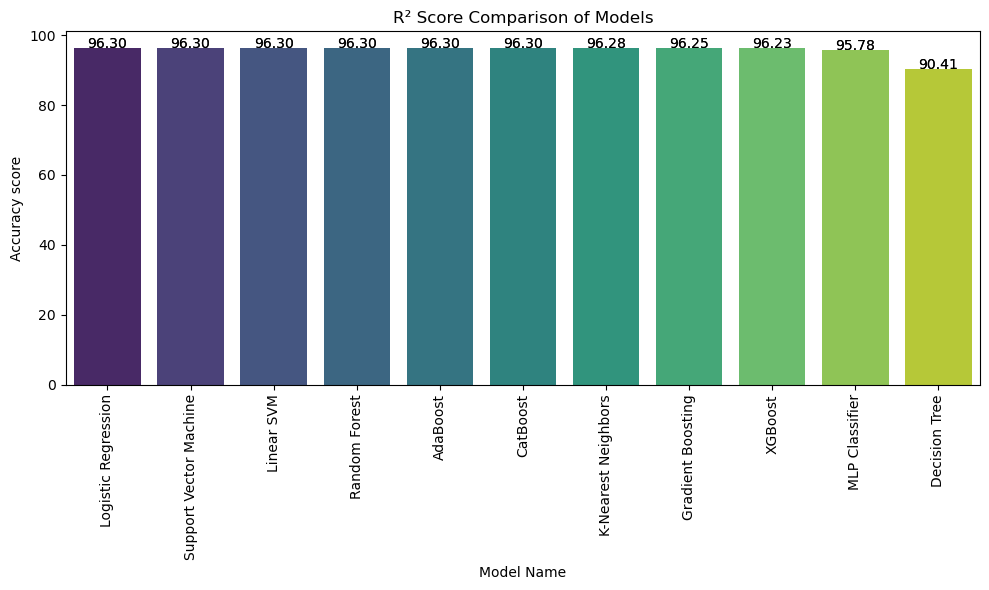

In [228]:
plt.figure(figsize=(10, 6)) # plotting using matplotlib
num = 0
for i in result :
    if num <= 7:
        a = sns.barplot(x='Model Name', y='Accuracy_score', data=result,palette='viridis')
        plt.title('R² Score Comparison of Models') # plotting using matplotlib
        plt.xlabel('Model Name') # plotting using matplotlib
        plt.ylabel('Accuracy score') # plotting using matplotlib
        # plt.ylim(0, 1.1) # plotting using matplotlib
        plt.xticks(rotation=90) # plotting using matplotlib
        
        for index,value in enumerate(result['Accuracy_score']):
            a.text(index,value + 0.02 , f'{value:.2f}',ha='center')

        num += 1

plt.tight_layout() # plotting using matplotlib
plt.show() # plotting using matplotlib

## Conclusion

### Top Performers:
- **Logistic Regression**, **Support Vector Machine**, **Linear SVM**, **Random Forest**, **AdaBoost**, and **CatBoost** — all scoring **96.30%**.
- These models show almost identical performance based on the R² score.

- **K Nearest Neighbors**: 96.28%
- **Gradient Boosting**: 96.25%
- **XGBoost**: 96.23%
- **MLP Classifier (Neural Network)**: 95.78%

- **Decision Tree**: 90.41% (significantly lower than the others)

### Observations:
- Most models are performing very similarly, clustering around **96% accuracy**.
- The **Decision Tree** stands out as the weaker model in this comparison.
- Ensemble methods like **Random Forest**, **AdaBoost**, **CatBoost**, **XGBoost**, and **Gradient Boosting** mostly perform well and consistently.


# Report on Challenges faced

* **Huge amount of data:** this dataset contains 3 tables after merging important tables rows goes to 1.9 lakhs and         columns goes to 105 which are huge because of this we faced more problem while doing work it was take more time for run     any cells.
  
* **Handling Missing Data:** Dealing with missing values across various features is critical to ensure that the dataset remains reliable and consistent, as gaps in data can undermine model accuracy
  
* **Selecting Relevant Features:** With numerous potential predictors, identifying the most informative features can be complex and essential for efficient model training. Removing irrelevant or redundant features without losing valuable information is a key step.
  
* **Addressing Class Imbalance:** In credit scoring, there’s often an imbalance between positive and negative classes. Without addressing this, the model could become biased toward predicting the majority class, leading to reduced accuracy for minority cases.
  
* **Multicollinearity:** Highly correlated features can complicate the model’s interpretability and reduce its effectiveness. Addressing these relationships is important to ensure the model remains stable and interpretable.
  
* **No EDA:** we can't do EDA in this dataset because 80% columns names are hide for security purposes and it's difficult   to get insights from data.because of this we got problem while doing EDA.


## Model Save

In [337]:
import pickle                             #Importing the pickle module
with open('best_model.pkl', 'wb') as file:
    pickle.dump(RandomForestClassifier(), file)                      #save it to the file

In [339]:
with open("best_model.pkl","rb") as f:   #Open the file "best_model.pkl" in read-binary mode
  model=pickle.load(f)

In [364]:
best_model

RandomForestClassifier()